# Hotel Booking Data Analysis Project

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymysql
from sqlalchemy import create_engine
sns.set_theme(style='whitegrid', palette='Set2', font_scale=1.1)

In [4]:
import plotly.express as px
pd.set_option('display.float_format', '{:,.2f}'.format)

## 1️⃣ Connect to MySQL Database

In [5]:
#Db deatils
username = 'root'
password = '1234'
host = 'localhost'
port = 3306
database = 'hotel_booking_db'

In [6]:
#create engine
engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}")

## 2️⃣ Load All Tables into Pandas

In [7]:
df_date = pd.read_sql("SELECT * FROM dim_date", engine)
df_hotels = pd.read_sql("SELECT * FROM dim_hotels", engine)
df_rooms = pd.read_sql("SELECT * FROM dim_rooms", engine)
df_agg_bookings = pd.read_sql("SELECT * FROM fact_aggregated_bookings", engine)
df_bookings = pd.read_sql("SELECT * FROM fact_bookings", engine)

## 3️⃣ Inspect DataFrames

In [8]:
df_bookings.head(5)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,Jul012216558RT11,16558,25-06-22,1/7/2022,2/7/2022,2,RT1,logtrip,0.00,No Show,9100,9100
1,Jul012216558RT110,16558,24-06-22,1/7/2022,3/7/2022,1,RT1,others,5.00,Checked Out,9100,9100
2,Jul012216558RT111,16558,11/6/2022,1/7/2022,5/7/2022,2,RT1,logtrip,0.00,Checked Out,9100,9100
3,Jul012216558RT12,16558,7/6/2022,1/7/2022,7/7/2022,2,RT1,tripster,0.00,Checked Out,9100,9100
4,Jul012216558RT13,16558,29-06-22,1/7/2022,2/7/2022,1,RT1,others,0.00,Cancelled,9100,3640


In [9]:
df_bookings.booking_status.value_counts()

booking_status
Checked Out    94411
Cancelled      33420
No Show         6759
Name: count, dtype: int64

In [10]:
df_bookings.shape

(134590, 12)

In [11]:
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134590 non-null  int64  
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      134590 non-null  float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 12.3+ MB


In [12]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [13]:
df_bookings.booking_status.unique()

array(['No Show', 'Checked Out', 'Cancelled'], dtype=object)

In [14]:
df_bookings.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

In [15]:
df_bookings.isnull().sum()

booking_id           0
property_id          0
booking_date         0
check_in_date        0
checkout_date        0
no_guests            0
room_category        0
booking_platform     0
ratings_given        0
booking_status       0
revenue_generated    0
revenue_realized     0
dtype: int64

In [16]:
df_bookings['ratings_given'].value_counts()

ratings_given
0.00    77907
5.00    19480
3.00    17561
4.00     9653
2.00     6452
1.00     3537
Name: count, dtype: int64

In [17]:
df_bookings[df_bookings['no_guests']<0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
30225,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1,RT2,others,0.00,Checked Out,13500,13500
44189,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4,RT4,logtrip,2.00,Checked Out,38760,38760
55911,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17,RT1,others,0.00,Checked Out,6500,6500
88708,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3,RT1,direct online,1.00,Checked Out,10010,10010
88720,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2,RT1,others,0.00,Cancelled,9100,3640
106669,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10,RT4,direct online,0.00,No Show,20900,20900
106775,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12,RT2,makeyourtrip,0.00,Cancelled,9000,3600
106856,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6,RT3,direct offline,5.00,Checked Out,16800,16800
106858,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4,RT3,direct online,0.00,Cancelled,14400,5760


In [18]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,"134,590.00","134,590.00","134,590.00","134,590.00","134,590.00"
mean,"18,061.11",2.04,1.52,"15,378.05","12,696.12"
std,"1,093.06",1.03,1.96,"93,036.04","6,928.11"
min,"16,558.00",-17.00,0.00,"6,500.00","2,600.00"
25%,"17,558.00",1.00,0.00,"9,900.00","7,600.00"
50%,"17,564.00",2.00,0.00,"13,500.00","11,700.00"
75%,"18,563.00",2.00,3.00,"18,000.00","15,300.00"
max,"19,563.00",6.00,5.00,"28,560,000.00","45,220.00"


In [19]:
df_agg_bookings.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30
1,19562,1-May-22,RT1,28,30
2,19563,1-May-22,RT1,23,30
3,17558,1-May-22,RT1,30,19
4,16558,1-May-22,RT1,18,19


In [20]:
df_agg_bookings.shape

(9200, 5)

In [21]:
df_agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   property_id          9200 non-null   int64 
 1   check_in_date        9200 non-null   object
 2   room_category        9200 non-null   object
 3   successful_bookings  9200 non-null   int64 
 4   capacity             9200 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 359.5+ KB


In [22]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

In [23]:
df_agg_bookings[df_agg_bookings['capacity']==0]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,0
14,17562,1-May-22,RT1,12,0


In [24]:
df_agg_bookings.describe()

,property_id,successful_bookings,capacity
count,"9,200.00","9,200.00","9,200.00"
mean,"18,040.64",14.66,25.27
std,"1,099.82",7.74,11.45
min,"16,558.00",1.00,0.00
25%,"17,558.00",9.00,18.00
50%,"17,564.00",14.00,25.00
75%,"18,563.00",19.00,34.00
max,"19,563.00",123.00,50.00


In [25]:
df_rooms.shape

(4, 2)

In [26]:
df_rooms.head(4)

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [27]:
df_date.head(4)

,date,mmm_yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday


In [28]:
df_date.tail(4)

,date,mmm_yy,week no,day_type
88,28-Jul-22,Jul 22,W 31,weekeday
89,29-Jul-22,Jul 22,W 31,weekeday
90,30-Jul-22,Jul 22,W 31,weekend
91,31-Jul-22,Jul 22,W 32,weekend


In [29]:
df_hotels.shape

(25, 4)

In [30]:
df_hotels.head(4)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi


In [31]:
df_hotels.property_name.unique()

array(['Atliq Grands', 'Atliq Exotica', 'Atliq City', 'Atliq Blu',
       'Atliq Bay', 'Atliq Palace', 'Atliq Seasons'], dtype=object)

In [32]:
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

In [33]:
df_hotels.city.value_counts()

city
Mumbai       8
Hyderabad    6
Bangalore    6
Delhi        5
Name: count, dtype: int64

## 4️⃣ Data Cleaning

### -- Handling NULL Values During Data Import

While importing data from MySQL into Python using pandas, I noticed that some `NULL` values in the SQL database were automatically converted to `0`. 

This happened because the original columns in MySQL were of numeric types (e.g., `INT`, `FLOAT`) and did not explicitly allow `NULL` values, leading to default values being inserted.
#### ✅ Solution:
To handle this correctly in the data analysis pipeline:
- I explicitly checked for `0` values in relevant numeric columns.
- Replaced suspicious `0`s with `NaN` using pandas:

 **(1) Replace 0 Ratings with Nan**

In [34]:
df_bookings[df_bookings['ratings_given']==0].shape

(77907, 12)

In [35]:
df_bookings['ratings_given'] = df_bookings['ratings_given'].replace(0, np.nan)
df_bookings.ratings_given.isna().sum()

np.int64(77907)

Total values in our dataframe is 134578. Out of that 77907 rows has null rating. Since there are many rows with null rating, we should not filter these values. Also we should not replace this rating with a median or mean rating etc

 **(2) Replace 0 Capacity with Nan**

In [36]:
df_agg_bookings[df_agg_bookings['capacity']==0]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,0
14,17562,1-May-22,RT1,12,0


In [37]:
df_agg_bookings['capacity'] = df_agg_bookings['capacity'].replace(0, np.nan)
df_agg_bookings[df_agg_bookings.capacity.isna()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


 **(3) Replace 0 no of guests with Nan**

In [38]:
df_bookings[df_bookings['no_guests']==0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
88730,May012216558RT213,16558,29-04-22,1/5/2022,2/5/2022,0,RT2,logtrip,4.00,Checked Out,12600,12600
88751,May012216558RT35,16558,29-04-22,1/5/2022,4/5/2022,0,RT3,others,NaN,Checked Out,18480,18480
88754,May012216558RT38,16558,27-04-22,1/5/2022,3/5/2022,0,RT3,makeyourtrip,NaN,Checked Out,16800,16800


In [39]:
df_bookings['no_guests'] = df_bookings['no_guests'].replace(0, np.nan)
df_bookings[df_bookings.no_guests.isna()]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
88730,May012216558RT213,16558,29-04-22,1/5/2022,2/5/2022,NaN,RT2,logtrip,4.00,Checked Out,12600,12600
88751,May012216558RT35,16558,29-04-22,1/5/2022,4/5/2022,NaN,RT3,others,NaN,Checked Out,18480,18480
88754,May012216558RT38,16558,27-04-22,1/5/2022,3/5/2022,NaN,RT3,makeyourtrip,NaN,Checked Out,16800,16800


 ### Clean Invalid Guests

In [40]:
df_bookings[df_bookings.no_guests < 0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
30225,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.00,RT2,others,NaN,Checked Out,13500,13500
44189,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.00,RT4,logtrip,2.00,Checked Out,38760,38760
55911,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.00,RT1,others,NaN,Checked Out,6500,6500
88708,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.00,RT1,direct online,1.00,Checked Out,10010,10010
88720,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.00,RT1,others,NaN,Cancelled,9100,3640
106669,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.00,RT4,direct online,NaN,No Show,20900,20900
106775,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.00,RT2,makeyourtrip,NaN,Cancelled,9000,3600
106856,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.00,RT3,direct offline,5.00,Checked Out,16800,16800
106858,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.00,RT3,direct online,NaN,Cancelled,14400,5760


As you can see above, number of guests having less than zero value represents data error. We can ignore these records.

In [41]:
df_bookings = df_bookings[df_bookings.no_guests > 0]

In [42]:
df_bookings.shape

(134578, 12)

 ### Fill Missing Capacity with Median

In [43]:
df_agg_bookings['capacity'].median()

np.float64(25.0)

In [44]:
df_agg_bookings['capacity'] = df_agg_bookings['capacity'].fillna(df_agg_bookings['capacity'].median())

In [45]:
df_agg_bookings.loc[[8,15]]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,25.00
15,17563,1-May-22,RT1,21,25.00


### Filter invalid Successful bookings

In [46]:
df_agg_bookings[df_agg_bookings['successful_bookings'] > df_agg_bookings['capacity']]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.00
12,16563,1-May-22,RT1,100,41.00
4136,19558,11-Jun-22,RT2,50,39.00
6209,19560,2-Jul-22,RT1,123,26.00
8522,19559,25-Jul-22,RT1,35,24.00
9194,18563,31-Jul-22,RT4,20,18.00


In [47]:
df_agg_bookings.shape

(9200, 5)

In [48]:
df_agg_bookings = df_agg_bookings[df_agg_bookings.successful_bookings <= df_agg_bookings.capacity]
df_agg_bookings.shape

(9194, 5)

### Outlier Detection and Removal in Revenue Generated

To ensure the accuracy and reliability of the analysis, I performed outlier detection on the `revenue_generated` column using the **3 standard deviation rule**.
According to this method, any data point that lies beyond **3 standard deviations** from the mean is considered a statistical outlier.

In [49]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,"134,578.00","134,578.00","56,679.00","134,578.00","134,578.00"
mean,"18,061.14",2.04,3.62,"15,378.04","12,696.01"
std,"1,093.05",1.03,1.23,"93,040.15","6,927.84"
min,"16,558.00",1.00,1.00,"6,500.00","2,600.00"
25%,"17,558.00",1.00,3.00,"9,900.00","7,600.00"
50%,"17,564.00",2.00,4.00,"13,500.00","11,700.00"
75%,"18,563.00",2.00,5.00,"18,000.00","15,300.00"
max,"19,563.00",6.00,5.00,"28,560,000.00","45,220.00"


In [50]:
%matplotlib inline

### Boxplot of Revenue Generated (before)

To identify and visualize extreme outliers in the `revenue_generated` column, I used a boxplot on a **logarithmic scale**.

- The log scale spreads the data more evenly across the axis, making extreme values visible.
- The circles on the far right represent outliers — values significantly higher than the rest.
- These outliers were later removed using the **3 standard deviation rule** to improve the quality of analysis.

Text(0.5, 0, 'Revenue Generated (Log Scale)')

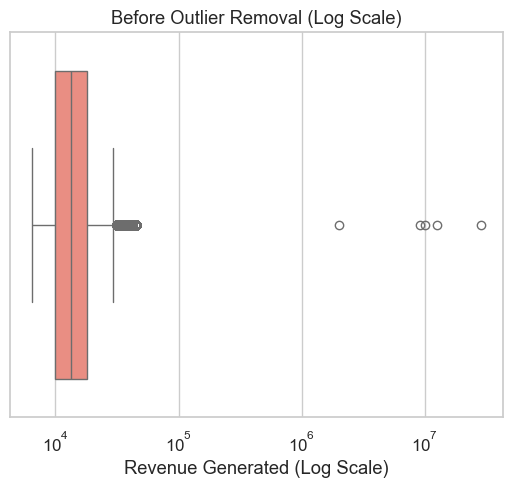

In [51]:
plt.figure(figsize=(14, 5))

# BEFORE outlier removal (log scale)
plt.subplot(1, 2, 1)
sns.boxplot(x=df_bookings['revenue_generated'], color='salmon')
plt.xscale('log')  # Apply log scale
plt.title('Before Outlier Removal (Log Scale)')
plt.xlabel('Revenue Generated (Log Scale)')

In [52]:
df_bookings.revenue_generated.min() , df_bookings.revenue_generated.max()

(np.int64(6500), np.int64(28560000))

In [53]:
df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.median()

(np.float64(15378.036937686695), np.float64(13500.0))

In [54]:
average = df_bookings.revenue_generated.mean()
std = df_bookings.revenue_generated.std()

In [55]:
Higher_limit = average + 3*std
Higher_limit

np.float64(294498.5017320791)

In [56]:
Lower_limit = average - 3*std
Lower_limit

np.float64(-263742.42785670573)

In [57]:
df_bookings[df_bookings.revenue_generated > Higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
39617,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.00,RT2,direct online,3.00,Checked Out,10000000,12600
88719,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.00,RT1,logtrip,5.00,Checked Out,9100000,9100
88829,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.00,RT3,direct online,NaN,Checked Out,28560000,28560
89033,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.00,RT2,direct offline,3.00,Checked Out,12600000,12600
89262,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.00,RT1,others,NaN,Cancelled,2000000,4420


**Filtering rows having revenue generated greater than higher limit**

In [58]:
df_bookings = df_bookings[df_bookings.revenue_generated <= Higher_limit]
df_bookings.shape

(134573, 12)

### Boxplot Of Revenue Generated (After)

- Most revenue values in a tighter range
- A clear median and quartile spread
- A few outliers still visible, which are mild and relevant for analysis

This step helped in improving data quality and making future insights more meaningful.

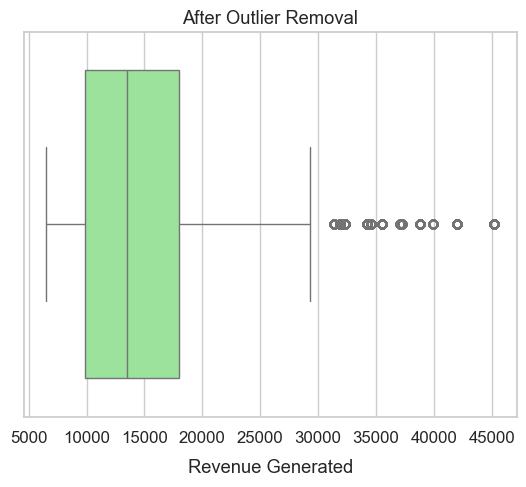

In [59]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 2)
sns.boxplot(x=df_bookings['revenue_generated'], color='lightgreen')
plt.title('After Outlier Removal')
plt.xlabel('Revenue Generated',labelpad=10)
plt.show()

In [60]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,"134,573.00","134,573.00","56,676.00","134,573.00","134,573.00"
mean,"18,061.19",2.04,3.62,"14,915.96","12,695.98"
std,"1,093.04",1.03,1.23,"6,452.68","6,927.79"
min,"16,558.00",1.00,1.00,"6,500.00","2,600.00"
25%,"17,558.00",1.00,3.00,"9,900.00","7,600.00"
50%,"17,564.00",2.00,4.00,"13,500.00","11,700.00"
75%,"18,563.00",2.00,5.00,"18,000.00","15,300.00"
max,"19,563.00",6.00,5.00,"45,220.00","45,220.00"


**Checking Outlier in Revenue Realized**

In [61]:
df_bookings.revenue_realized.describe()

count   134,573.00
mean     12,695.98
std       6,927.79
min       2,600.00
25%       7,600.00
50%      11,700.00
75%      15,300.00
max      45,220.00
Name: revenue_realized, dtype: float64

In [62]:
higher_limit = df_bookings.revenue_realized.mean() + 3*df_bookings.revenue_realized.std()
higher_limit

np.float64(33479.358661845814)

In [63]:
df_bookings[df_bookings.revenue_realized>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
98,Jul012216559RT410,16559,27-06-22,1/7/2022,2/7/2022,3.00,RT4,direct online,NaN,Checked Out,35530,35530
99,Jul012216559RT411,16559,26-06-22,1/7/2022,2/7/2022,6.00,RT4,tripster,NaN,Checked Out,45220,45220
433,Jul012217559RT42,17559,26-06-22,1/7/2022,2/7/2022,4.00,RT4,others,5.00,Checked Out,38760,38760
438,Jul012217559RT47,17559,29-06-22,1/7/2022,4/7/2022,3.00,RT4,others,1.00,Checked Out,35530,35530
649,Jul012217563RT412,17563,26-06-22,1/7/2022,2/7/2022,4.00,RT4,others,5.00,Checked Out,38760,38760
...,...,...,...,...,...,...,...,...,...,...,...,...
133703,May312216563RT48,16563,31-05-22,31-05-22,1/6/2022,5.00,RT4,others,5.00,Checked Out,34580,34580
133790,May312217559RT41,17559,10/5/2022,31-05-22,1/6/2022,5.00,RT4,others,5.00,Checked Out,41990,41990
133792,May312217559RT43,17559,28-05-22,31-05-22,5/6/2022,4.00,RT4,direct online,NaN,Checked Out,38760,38760
133795,May312217559RT46,17559,26-05-22,31-05-22,1/6/2022,4.00,RT4,others,5.00,Checked Out,38760,38760


One observation we can have in above dataframe is that all rooms are RT4 which means presidential suit. Now since RT4 is a luxurious room it is likely their rent will be higher. To make a fair analysis, we need to do data analysis only on RT4 room types

In [64]:
df_bookings[df_bookings.room_category=="RT4"].revenue_realized.describe()

count   16,071.00
mean    23,439.31
std      9,048.60
min      7,600.00
25%     19,000.00
50%     26,600.00
75%     32,300.00
max     45,220.00
Name: revenue_realized, dtype: float64

In [65]:
# mean + 3*standard deviation
23439+3*9048

50583

Here higher limit comes to be 50583 and in our dataframe above we can see that max value for revenue realized is 45220. Hence we can conclude that there is no outlier and we don't need to do any data cleaning on this particular column

### Histogram of Revenue Realized

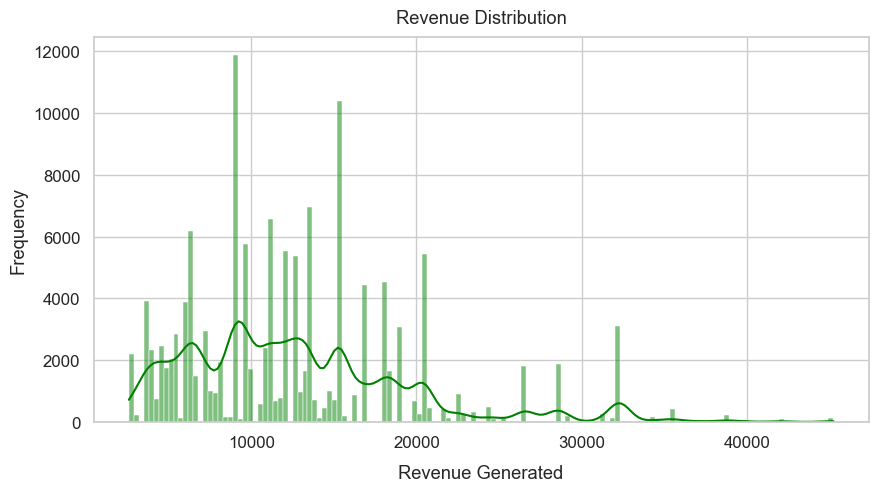

In [66]:
plt.figure(figsize=(10, 5))
sns.histplot(df_bookings['revenue_realized'], kde=True, color='green')
plt.title('Revenue Distribution',pad=10)
plt.xlabel('Revenue Generated',labelpad=10)
plt.ylabel('Frequency')
plt.show()

### Date Column Conversion
The `date` column in all tables was initially stored as an object data type.  
To enable time-series analysis and ensure consistency, it was converted to datetime format using `pd.to_datetime()`.

In [67]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm_yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [68]:
df_date.head(2)

,date,mmm_yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday


In [69]:
df_date['date'] = pd.to_datetime(df_date['date'],format = '%d-%b-%y' )
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      92 non-null     datetime64[ns]
 1   mmm_yy    92 non-null     object        
 2   week no   92 non-null     object        
 3   day_type  92 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ KB


**Convert `check_in_date` and `check_out_date` to datetime**

In [70]:
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134573 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 13.3+ MB


In [71]:
df_bookings.check_in_date.unique()

array(['1/7/2022', '2/7/2022', '3/7/2022', '4/7/2022', '5/7/2022',
       '6/7/2022', '7/7/2022', '8/7/2022', '9/7/2022', '10/7/2022',
       '11/7/2022', '12/7/2022', '13-07-22', '14-07-22', '15-07-22',
       '16-07-22', '17-07-22', '18-07-22', '19-07-22', '20-07-22',
       '21-07-22', '22-07-22', '23-07-22', '24-07-22', '25-07-22',
       '26-07-22', '27-07-22', '28-07-22', '29-07-22', '30-07-22',
       '31-07-22', '1/6/2022', '2/6/2022', '3/6/2022', '4/6/2022',
       '5/6/2022', '6/6/2022', '7/6/2022', '8/6/2022', '9/6/2022',
       '10/6/2022', '11/6/2022', '12/6/2022', '13-06-22', '14-06-22',
       '15-06-22', '16-06-22', '17-06-22', '18-06-22', '19-06-22',
       '20-06-22', '21-06-22', '22-06-22', '23-06-22', '24-06-22',
       '25-06-22', '26-06-22', '27-06-22', '28-06-22', '29-06-22',
       '30-06-22', '1/5/2022', '2/5/2022', '3/5/2022', '4/5/2022',
       '5/5/2022', '6/5/2022', '7/5/2022', '8/5/2022', '9/5/2022',
       '10/5/2022', '11/5/2022', '12/5/2022', '13-05-22'

The `check_in_date`and `checkout_date` column contained inconsistent date formats such as `'1/7/2022'` and `'13-07-22'`, which can lead to errors during datetime conversion and time-series analysis.

To address this:
- All slashes `/` were replaced with hyphens `-` to bring consistency in separators.
- Leading/trailing whitespaces were stripped (if any).
- The column was then converted to `datetime` format using `pd.to_datetime()`.

This step ensures proper date parsing and allows for time-based filtering, grouping, and trend analysis.

In [72]:
df_bookings['check_in_date'] = (
    df_bookings['check_in_date']
    .astype(str)
    .str.strip()
    .str.replace('/', '-', regex=False)
)

df_bookings['check_in_date'] = pd.to_datetime(df_bookings['check_in_date'],format = 'mixed',dayfirst=True)
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134573 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134573 non-null  object        
 1   property_id        134573 non-null  int64         
 2   booking_date       134573 non-null  object        
 3   check_in_date      134573 non-null  datetime64[ns]
 4   checkout_date      134573 non-null  object        
 5   no_guests          134573 non-null  float64       
 6   room_category      134573 non-null  object        
 7   booking_platform   134573 non-null  object        
 8   ratings_given      56676 non-null   float64       
 9   booking_status     134573 non-null  object        
 10  revenue_generated  134573 non-null  int64         
 11  revenue_realized   134573 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 13.3+ MB


In [73]:
df_bookings.checkout_date.unique()

array(['2/7/2022', '3/7/2022', '5/7/2022', '7/7/2022', '6/7/2022',
       '4/7/2022', '8/7/2022', '9/7/2022', '10/7/2022', '11/7/2022',
       '12/7/2022', '13-07-22', '14-07-22', '15-07-22', '16-07-22',
       '17-07-22', '18-07-22', '19-07-22', '20-07-22', '21-07-22',
       '22-07-22', '23-07-22', '24-07-22', '25-07-22', '26-07-22',
       '27-07-22', '28-07-22', '29-07-22', '30-07-22', '31-07-22',
       '1/8/2022', '2/8/2022', '3/8/2022', '4/8/2022', '5/8/2022',
       '6/8/2022', '2/6/2022', '7/6/2022', '3/6/2022', '6/6/2022',
       '4/6/2022', '5/6/2022', '8/6/2022', '9/6/2022', '10/6/2022',
       '11/6/2022', '12/6/2022', '13-06-22', '14-06-22', '15-06-22',
       '16-06-22', '17-06-22', '18-06-22', '19-06-22', '20-06-22',
       '21-06-22', '22-06-22', '23-06-22', '24-06-22', '25-06-22',
       '26-06-22', '27-06-22', '28-06-22', '29-06-22', '30-06-22',
       '1/7/2022', '2/5/2022', '7/5/2022', '5/5/2022', '3/5/2022',
       '6/5/2022', '4/5/2022', '8/5/2022', '9/5/2022', '

In [74]:
df_bookings['checkout_date'] = (
    df_bookings['checkout_date']
    .astype(str)
    .str.strip()
    .str.replace('/', '-', regex=False)
)
df_bookings['checkout_date'] = pd.to_datetime(df_bookings['checkout_date'],format = 'mixed',dayfirst = True)
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134573 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134573 non-null  object        
 1   property_id        134573 non-null  int64         
 2   booking_date       134573 non-null  object        
 3   check_in_date      134573 non-null  datetime64[ns]
 4   checkout_date      134573 non-null  datetime64[ns]
 5   no_guests          134573 non-null  float64       
 6   room_category      134573 non-null  object        
 7   booking_platform   134573 non-null  object        
 8   ratings_given      56676 non-null   float64       
 9   booking_status     134573 non-null  object        
 10  revenue_generated  134573 non-null  int64         
 11  revenue_realized   134573 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(3), object(5)
memory usage: 13.3+ MB


**Convert `check_in_date` in df_agg_bookings to datetime format**

In [75]:
df_agg_bookings.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9194 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9194 non-null   int64  
 1   check_in_date        9194 non-null   object 
 2   room_category        9194 non-null   object 
 3   successful_bookings  9194 non-null   int64  
 4   capacity             9194 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 431.0+ KB


In [76]:
df_agg_bookings['check_in_date'] = pd.to_datetime(df_agg_bookings['check_in_date'],format="%d-%b-%y")
df_agg_bookings.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,2022-05-01,RT1,25,30.00
1,19562,2022-05-01,RT1,28,30.00
2,19563,2022-05-01,RT1,23,30.00
4,16558,2022-05-01,RT1,18,19.00
5,17560,2022-05-01,RT1,28,40.00


In [77]:
df_agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9194 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   property_id          9194 non-null   int64         
 1   check_in_date        9194 non-null   datetime64[ns]
 2   room_category        9194 non-null   object        
 3   successful_bookings  9194 non-null   int64         
 4   capacity             9194 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 431.0+ KB


## 5️⃣ Merging Datasets

--Merged the `df_agg_bookings` data with `df_rooms` using `room_category` and `room_id` to add room information for further analysis.

In [78]:
df = pd.merge(df_agg_bookings, df_rooms, left_on="room_category", right_on="room_id")
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,room_id,room_class
0,16559,2022-05-01,RT1,25,30.00,RT1,Standard
1,19562,2022-05-01,RT1,28,30.00,RT1,Standard
2,19563,2022-05-01,RT1,23,30.00,RT1,Standard
3,16558,2022-05-01,RT1,18,19.00,RT1,Standard


In [79]:
df.drop("room_id",axis = 1,inplace = True)
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,room_class
0,16559,2022-05-01,RT1,25,30.00,Standard
1,19562,2022-05-01,RT1,28,30.00,Standard
2,19563,2022-05-01,RT1,23,30.00,Standard
3,16558,2022-05-01,RT1,18,19.00,Standard


--Merged table `df` with `df_hotels`on `property_id` to include property-specific attributes.

In [80]:
df = pd.merge(df , df_hotels ,on = "property_id")
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,room_class,property_name,category,city
0,16559,2022-05-01,RT1,25,30.00,Standard,Atliq Exotica,Luxury,Mumbai
1,19562,2022-05-01,RT1,28,30.00,Standard,Atliq Bay,Luxury,Bangalore
2,19563,2022-05-01,RT1,23,30.00,Standard,Atliq Palace,Business,Bangalore
3,16558,2022-05-01,RT1,18,19.00,Standard,Atliq Grands,Luxury,Delhi


--Merged table `df` with `df_date` using `check_in_date` and `date` columns.

In [81]:
df = pd.merge(df, df_date, left_on="check_in_date", right_on="date")
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,room_class,property_name,category,city,date,mmm_yy,week no,day_type
0,16559,2022-05-01,RT1,25,30.00,Standard,Atliq Exotica,Luxury,Mumbai,2022-05-01,May 22,W 19,weekend
1,19562,2022-05-01,RT1,28,30.00,Standard,Atliq Bay,Luxury,Bangalore,2022-05-01,May 22,W 19,weekend
2,19563,2022-05-01,RT1,23,30.00,Standard,Atliq Palace,Business,Bangalore,2022-05-01,May 22,W 19,weekend


--Merged Booking data `df_bookings` with `df_hotels` using `property_id` for further analysis

In [82]:
df_bookings_all = pd.merge(df_bookings, df_hotels, on = "property_id")
df_bookings_all.head(5)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,Jul012216558RT11,16558,25-06-22,2022-07-01,2022-07-02,2.00,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi
1,Jul012216558RT110,16558,24-06-22,2022-07-01,2022-07-03,1.00,RT1,others,5.00,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
2,Jul012216558RT111,16558,11/6/2022,2022-07-01,2022-07-05,2.00,RT1,logtrip,NaN,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,Jul012216558RT12,16558,7/6/2022,2022-07-01,2022-07-07,2.00,RT1,tripster,NaN,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
4,Jul012216558RT13,16558,29-06-22,2022-07-01,2022-07-02,1.00,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi


--Merged booking data `df_bookings_all` with `df_date` 

In [83]:
df_bookings_all = pd.merge(df_bookings_all, df_date, left_on="check_in_date", right_on="date")
df_bookings_all.head(5)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm_yy,week no,day_type
0,Jul012216558RT11,16558,25-06-22,2022-07-01,2022-07-02,2.00,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi,2022-07-01,Jul 22,W 27,weekeday
1,Jul012216558RT110,16558,24-06-22,2022-07-01,2022-07-03,1.00,RT1,others,5.00,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-07-01,Jul 22,W 27,weekeday
2,Jul012216558RT111,16558,11/6/2022,2022-07-01,2022-07-05,2.00,RT1,logtrip,NaN,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-07-01,Jul 22,W 27,weekeday
3,Jul012216558RT12,16558,7/6/2022,2022-07-01,2022-07-07,2.00,RT1,tripster,NaN,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-07-01,Jul 22,W 27,weekeday
4,Jul012216558RT13,16558,29-06-22,2022-07-01,2022-07-02,1.00,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-07-01,Jul 22,W 27,weekeday


In [84]:
df_rooms.head(3)

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium


--Merged `df_bookings_all` with `df_room` to add room information for further analysis.

In [85]:
df_bookings_all = pd.merge(df_bookings_all, df_rooms, left_on="room_category", right_on="room_id")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,...,revenue_realized,property_name,category,city,date,mmm_yy,week no,day_type,room_id,room_class
0,Jul012216558RT11,16558,25-06-22,2022-07-01,2022-07-02,2.00,RT1,logtrip,NaN,No Show,...,9100,Atliq Grands,Luxury,Delhi,2022-07-01,Jul 22,W 27,weekeday,RT1,Standard
1,Jul012216558RT110,16558,24-06-22,2022-07-01,2022-07-03,1.00,RT1,others,5.00,Checked Out,...,9100,Atliq Grands,Luxury,Delhi,2022-07-01,Jul 22,W 27,weekeday,RT1,Standard
2,Jul012216558RT111,16558,11/6/2022,2022-07-01,2022-07-05,2.00,RT1,logtrip,NaN,Checked Out,...,9100,Atliq Grands,Luxury,Delhi,2022-07-01,Jul 22,W 27,weekeday,RT1,Standard


In [86]:
df_bookings_all.drop("room_id",axis = 1,inplace = True)
df_bookings_all.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm_yy,week no,day_type,room_class
0,Jul012216558RT11,16558,25-06-22,2022-07-01,2022-07-02,2.00,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi,2022-07-01,Jul 22,W 27,weekeday,Standard
1,Jul012216558RT110,16558,24-06-22,2022-07-01,2022-07-03,1.00,RT1,others,5.00,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-07-01,Jul 22,W 27,weekeday,Standard
2,Jul012216558RT111,16558,11/6/2022,2022-07-01,2022-07-05,2.00,RT1,logtrip,NaN,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-07-01,Jul 22,W 27,weekeday,Standard
3,Jul012216558RT12,16558,7/6/2022,2022-07-01,2022-07-07,2.00,RT1,tripster,NaN,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-07-01,Jul 22,W 27,weekeday,Standard


## 6️⃣ Feature Engineering

Created new columns to enhance the dataset for deeper analysis:
- **Occupancy % (Occ %)**: Indicates room occupancy rate.
- **Stay Length**: Calculated number of nights stayed.
- **Revenue per Guest**: Helps assess per-person revenue performance.
- **ADR**: Average revenue earned per occupied room per day

**(1) Create Occupancy percentage column**

In [87]:
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,room_class,property_name,category,city,date,mmm_yy,week no,day_type
0,16559,2022-05-01,RT1,25,30.00,Standard,Atliq Exotica,Luxury,Mumbai,2022-05-01,May 22,W 19,weekend
1,19562,2022-05-01,RT1,28,30.00,Standard,Atliq Bay,Luxury,Bangalore,2022-05-01,May 22,W 19,weekend
2,19563,2022-05-01,RT1,23,30.00,Standard,Atliq Palace,Business,Bangalore,2022-05-01,May 22,W 19,weekend
3,16558,2022-05-01,RT1,18,19.00,Standard,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend


In [88]:
df['occ_pct'] = df.apply(lambda row: row['successful_bookings']/row['capacity'],axis = 1)

In [89]:
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,room_class,property_name,category,city,date,mmm_yy,week no,day_type,occ_pct
0,16559,2022-05-01,RT1,25,30.00,Standard,Atliq Exotica,Luxury,Mumbai,2022-05-01,May 22,W 19,weekend,0.83
1,19562,2022-05-01,RT1,28,30.00,Standard,Atliq Bay,Luxury,Bangalore,2022-05-01,May 22,W 19,weekend,0.93
2,19563,2022-05-01,RT1,23,30.00,Standard,Atliq Palace,Business,Bangalore,2022-05-01,May 22,W 19,weekend,0.77
3,16558,2022-05-01,RT1,18,19.00,Standard,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend,0.95


**Convert it to a percentage value**

In [90]:
df['occ_pct'] = df['occ_pct'].apply(lambda x: round(x*100, 2))
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,room_class,property_name,category,city,date,mmm_yy,week no,day_type,occ_pct
0,16559,2022-05-01,RT1,25,30.00,Standard,Atliq Exotica,Luxury,Mumbai,2022-05-01,May 22,W 19,weekend,83.33
1,19562,2022-05-01,RT1,28,30.00,Standard,Atliq Bay,Luxury,Bangalore,2022-05-01,May 22,W 19,weekend,93.33
2,19563,2022-05-01,RT1,23,30.00,Standard,Atliq Palace,Business,Bangalore,2022-05-01,May 22,W 19,weekend,76.67
3,16558,2022-05-01,RT1,18,19.00,Standard,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend,94.74


**(2) ADR (Average Daily Rate)**

ADR is calculated using the actual revenue realized and the number of rooms sold (successful bookings).
We first aggregated the revenue from the booking-level table (`df_bookings_all`) and merged it with the aggregated table (`df`). Then, we calculated ADR for each property, room category, and date combination.

In [91]:
Adr_data = df_bookings_all.groupby(
    ['property_id', 'check_in_date', 'room_category'], as_index=False
)['revenue_realized'].sum()

In [92]:
df_with_revenue = pd.merge(df, Adr_data, on=['property_id', 'check_in_date', 'room_category'], how='left')


In [93]:
df_with_revenue.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,room_class,property_name,category,city,date,mmm_yy,week no,day_type,occ_pct,revenue_realized
0,16559,2022-05-01,RT1,25,30.00,Standard,Atliq Exotica,Luxury,Mumbai,2022-05-01,May 22,W 19,weekend,83.33,235586
1,19562,2022-05-01,RT1,28,30.00,Standard,Atliq Bay,Luxury,Bangalore,2022-05-01,May 22,W 19,weekend,93.33,241410
2,19563,2022-05-01,RT1,23,30.00,Standard,Atliq Palace,Business,Bangalore,2022-05-01,May 22,W 19,weekend,76.67,195000
3,16558,2022-05-01,RT1,18,19.00,Standard,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend,94.74,124670


In [94]:
df_with_revenue['ADR'] =  df_with_revenue['revenue_realized'] / df_with_revenue['successful_bookings']
df_with_revenue.head(2)

,property_id,check_in_date,room_category,successful_bookings,capacity,room_class,property_name,category,city,date,mmm_yy,week no,day_type,occ_pct,revenue_realized,ADR
0,16559,2022-05-01,RT1,25,30.00,Standard,Atliq Exotica,Luxury,Mumbai,2022-05-01,May 22,W 19,weekend,83.33,235586,"9,423.44"
1,19562,2022-05-01,RT1,28,30.00,Standard,Atliq Bay,Luxury,Bangalore,2022-05-01,May 22,W 19,weekend,93.33,241410,"8,621.79"


-- Reassigned df to the merged DataFrame df_with_revenue that includes revenue data for ADR calculation.

In [95]:
df = df_with_revenue

In [96]:
df.head(2)

,property_id,check_in_date,room_category,successful_bookings,capacity,room_class,property_name,category,city,date,mmm_yy,week no,day_type,occ_pct,revenue_realized,ADR
0,16559,2022-05-01,RT1,25,30.00,Standard,Atliq Exotica,Luxury,Mumbai,2022-05-01,May 22,W 19,weekend,83.33,235586,"9,423.44"
1,19562,2022-05-01,RT1,28,30.00,Standard,Atliq Bay,Luxury,Bangalore,2022-05-01,May 22,W 19,weekend,93.33,241410,"8,621.79"


**(3) Create Revenue per Guest**

Added a metric to understand average revenue contributed by each guest.

In [97]:
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm_yy,week no,day_type,room_class
0,Jul012216558RT11,16558,25-06-22,2022-07-01,2022-07-02,2.00,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi,2022-07-01,Jul 22,W 27,weekeday,Standard
1,Jul012216558RT110,16558,24-06-22,2022-07-01,2022-07-03,1.00,RT1,others,5.00,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-07-01,Jul 22,W 27,weekeday,Standard
2,Jul012216558RT111,16558,11/6/2022,2022-07-01,2022-07-05,2.00,RT1,logtrip,NaN,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-07-01,Jul 22,W 27,weekeday,Standard


In [98]:
df_bookings_all['Revenue_per_guest'] = df_bookings_all.apply(lambda row: row['revenue_realized']/row['no_guests'],axis = 1)
df_bookings_all.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,...,revenue_realized,property_name,category,city,date,mmm_yy,week no,day_type,room_class,Revenue_per_guest
0,Jul012216558RT11,16558,25-06-22,2022-07-01,2022-07-02,2.00,RT1,logtrip,NaN,No Show,...,9100,Atliq Grands,Luxury,Delhi,2022-07-01,Jul 22,W 27,weekeday,Standard,"4,550.00"
1,Jul012216558RT110,16558,24-06-22,2022-07-01,2022-07-03,1.00,RT1,others,5.00,Checked Out,...,9100,Atliq Grands,Luxury,Delhi,2022-07-01,Jul 22,W 27,weekeday,Standard,"9,100.00"
2,Jul012216558RT111,16558,11/6/2022,2022-07-01,2022-07-05,2.00,RT1,logtrip,NaN,Checked Out,...,9100,Atliq Grands,Luxury,Delhi,2022-07-01,Jul 22,W 27,weekeday,Standard,"4,550.00"
3,Jul012216558RT12,16558,7/6/2022,2022-07-01,2022-07-07,2.00,RT1,tripster,NaN,Checked Out,...,9100,Atliq Grands,Luxury,Delhi,2022-07-01,Jul 22,W 27,weekeday,Standard,"4,550.00"


**(4) Create Stay length**

Created a new column `stay_length` to calculate the number of days between check-in and checkout dates.

In [99]:
df_bookings_all['stay_length'] = (df_bookings_all['checkout_date'] - df_bookings_all['check_in_date']).dt.days

In [100]:
df_bookings_all.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,...,property_name,category,city,date,mmm_yy,week no,day_type,room_class,Revenue_per_guest,stay_length
0,Jul012216558RT11,16558,25-06-22,2022-07-01,2022-07-02,2.00,RT1,logtrip,NaN,No Show,...,Atliq Grands,Luxury,Delhi,2022-07-01,Jul 22,W 27,weekeday,Standard,"4,550.00",1
1,Jul012216558RT110,16558,24-06-22,2022-07-01,2022-07-03,1.00,RT1,others,5.00,Checked Out,...,Atliq Grands,Luxury,Delhi,2022-07-01,Jul 22,W 27,weekeday,Standard,"9,100.00",2
2,Jul012216558RT111,16558,11/6/2022,2022-07-01,2022-07-05,2.00,RT1,logtrip,NaN,Checked Out,...,Atliq Grands,Luxury,Delhi,2022-07-01,Jul 22,W 27,weekeday,Standard,"4,550.00",4
3,Jul012216558RT12,16558,7/6/2022,2022-07-01,2022-07-07,2.00,RT1,tripster,NaN,Checked Out,...,Atliq Grands,Luxury,Delhi,2022-07-01,Jul 22,W 27,weekeday,Standard,"4,550.00",6


## 7️⃣ Exploratory Data Analysis

### ✳️ A. Univariate Analysis

Analyzed individual variables to understand their distribution, frequency, and summary statistics using visual and statistical methods.

In [101]:
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,...,property_name,category,city,date,mmm_yy,week no,day_type,room_class,Revenue_per_guest,stay_length
0,Jul012216558RT11,16558,25-06-22,2022-07-01,2022-07-02,2.00,RT1,logtrip,NaN,No Show,...,Atliq Grands,Luxury,Delhi,2022-07-01,Jul 22,W 27,weekeday,Standard,"4,550.00",1
1,Jul012216558RT110,16558,24-06-22,2022-07-01,2022-07-03,1.00,RT1,others,5.00,Checked Out,...,Atliq Grands,Luxury,Delhi,2022-07-01,Jul 22,W 27,weekeday,Standard,"9,100.00",2
2,Jul012216558RT111,16558,11/6/2022,2022-07-01,2022-07-05,2.00,RT1,logtrip,NaN,Checked Out,...,Atliq Grands,Luxury,Delhi,2022-07-01,Jul 22,W 27,weekeday,Standard,"4,550.00",4


### Distribution of Stay Length

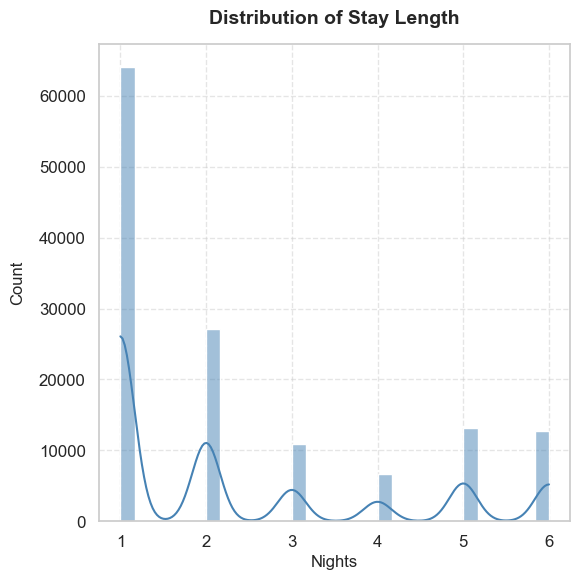

In [102]:
plt.figure(figsize=(6, 6))
sns.histplot(df_bookings_all['stay_length'], bins=30, color='steelblue', kde=True)
plt.title('Distribution of Stay Length', fontsize=14, pad=15,fontweight='semibold')
plt.xlabel('Nights', fontsize=12)
plt.ylabel('Count', fontsize=12,labelpad=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### Insight:
- Most bookings are for 1-night stays, showing a clear preference for short visits.
- There are smaller peaks at 2 and 5–6 nights, likely due to weekend or short vacation trends. Overall, the distribution is right-skewed, suggesting     longer stays are less common.

### Distribution of Guest Ratings

In [103]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

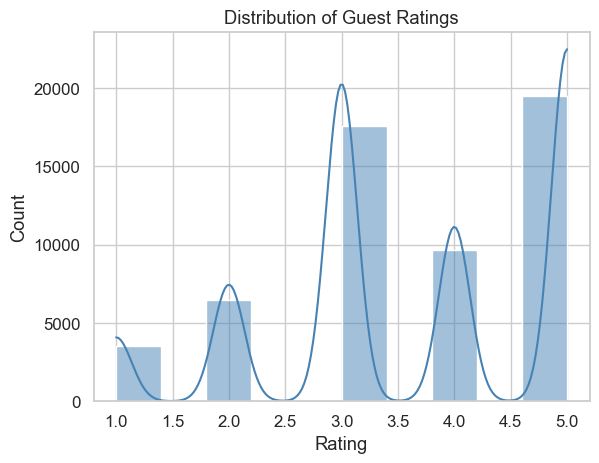

In [104]:
sns.histplot(df_bookings_all['ratings_given'],
             bins=10,
             kde=True,
             color='steelblue')
plt.title('Distribution of Guest Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

#### Insight:

Guest ratings are bimodal, with peaks at 3 and 5 stars, indicating a mix of average and highly satisfied guests. Lower ratings are less frequent, suggesting overall positive guest experiences.

### Distribution of Number of Guests per Booking

In [105]:
df_bookings_all['no_guests'] = df_bookings_all['no_guests'].astype('int')

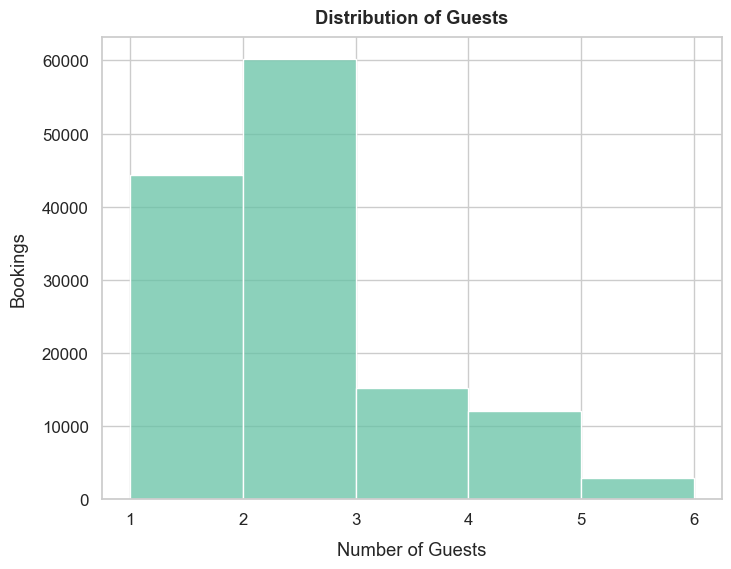

In [106]:
plt.figure(figsize=(8, 6))
sns.histplot(df_bookings_all['no_guests'], bins=range(1, df_bookings_all['no_guests'].max()+1))
plt.title('Distribution of Guests',pad=10,fontweight='semibold')
plt.xlabel('Number of Guests',labelpad=10)
plt.ylabel('Bookings',labelpad=10)
plt.show()

#### Insight:

More than 75% of bookings are made for 1 or 2 guests, indicating a strong preference for solo or couple stays. Bookings with 3 or more guests account for less than 25%, suggesting that larger group bookings are relatively rare.

### Revenue per Guest: Distribution & Outlier Analysis

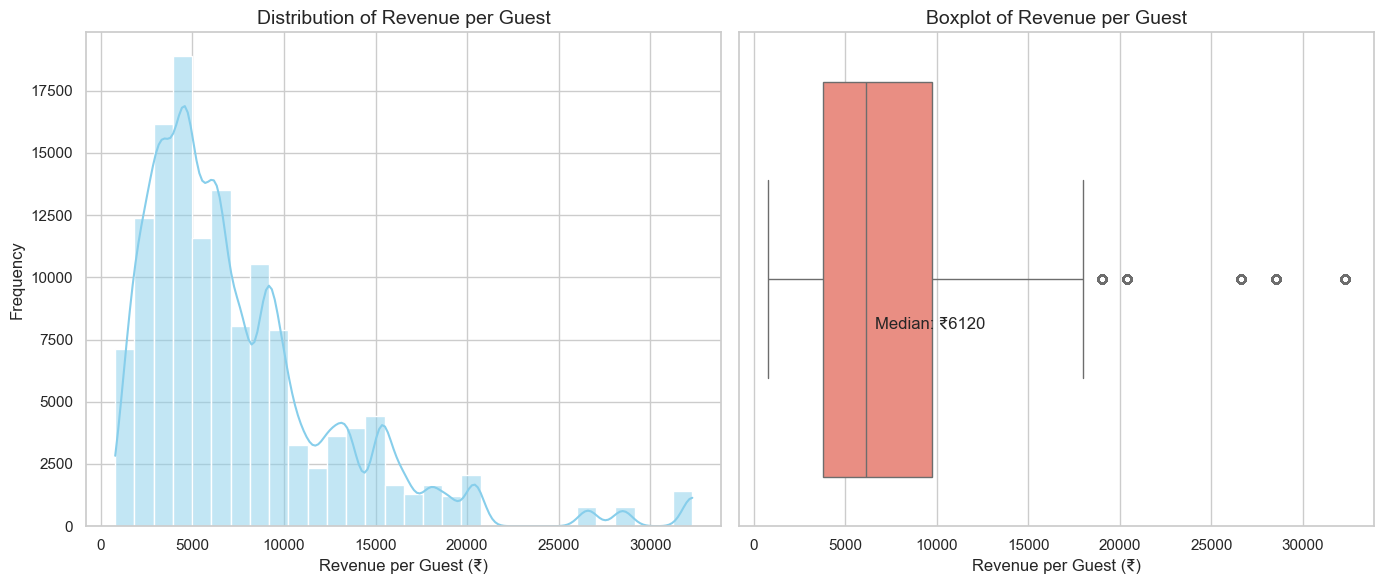

In [107]:
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6)) #Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_bookings_all['Revenue_per_guest'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Revenue per Guest', fontsize=14)
plt.xlabel('Revenue per Guest (₹)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Boxplot (Right plot)
plt.subplot(1, 2, 2)
median_val = df_bookings_all['Revenue_per_guest'].median()
plt.text(median_val+500, 0.1, f'Median: ₹{int(median_val)}', fontsize=12)
sns.boxplot(x=df_bookings_all['Revenue_per_guest'], color='salmon')
plt.title('Boxplot of Revenue per Guest', fontsize=14)
plt.xlabel('Revenue per Guest (₹)', fontsize=12)

plt.tight_layout()
plt.show()


#### Insight:

Revenue per guest is right-skewed, with a median of ₹6,120. High-value outliers (>₹20K) are rare but significantly lift the mean, indicating a small segment of premium customers driving disproportionate revenue.

### Distribution of Average Daily Rate(ADR)

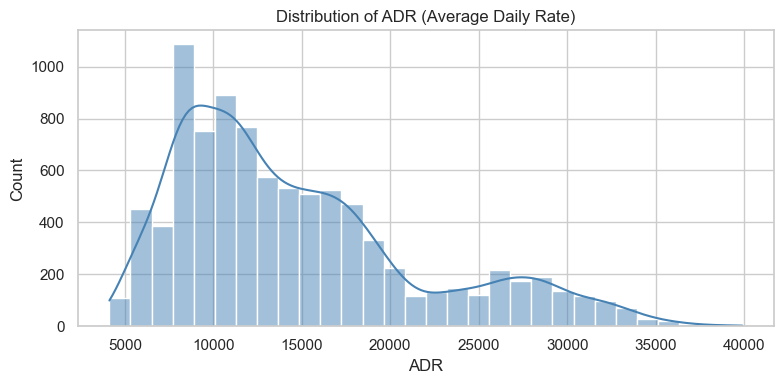

In [108]:
plt.figure(figsize=(8, 4))
sns.histplot(df['ADR'], bins=30, kde=True, color='steelblue')
plt.title('Distribution of ADR (Average Daily Rate)')
plt.xlabel('ADR')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


#### Insight:

Premium ADR peaks occur sporadically, suggesting seasonal demand or targeted high-value bookings

### Occupancy % : Distribution & Outlier Analysis

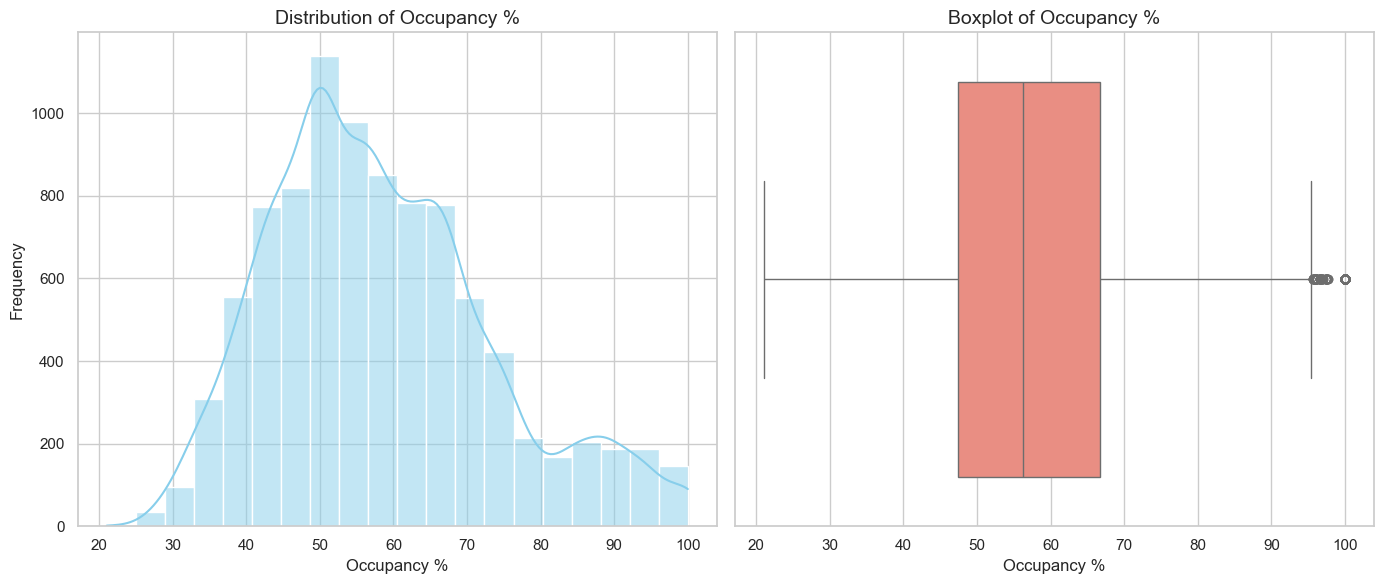

In [109]:
# Set style
sns.set(style="whitegrid")

# Create subplot for side-by-side charts
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram
sns.histplot(df['occ_pct'], bins=20, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribution of Occupancy %', fontsize=14)
axes[0].set_xlabel('Occupancy %')
axes[0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(x=df['occ_pct'], color='salmon', ax=axes[1])
axes[1].set_title('Boxplot of Occupancy %', fontsize=14)
axes[1].set_xlabel('Occupancy %')

# Tight layout
plt.tight_layout()
plt.show()

#### Insight:

The occupancy percentage predominantly falls between 50% and 65%, indicating moderate utilization with scope for optimization. The distribution is slightly right-skewed, showing occasional peaks above 90% during high-demand periods, which could be leveraged for dynamic pricing. 

### Booking Distribution by Platform

In [110]:
booking_counts = df_bookings_all['booking_platform'].value_counts()
print(booking_counts)


booking_platform
others            55061
makeyourtrip      26896
logtrip           14753
direct online     13374
tripster           9630
journey            8106
direct offline     6753
Name: count, dtype: int64


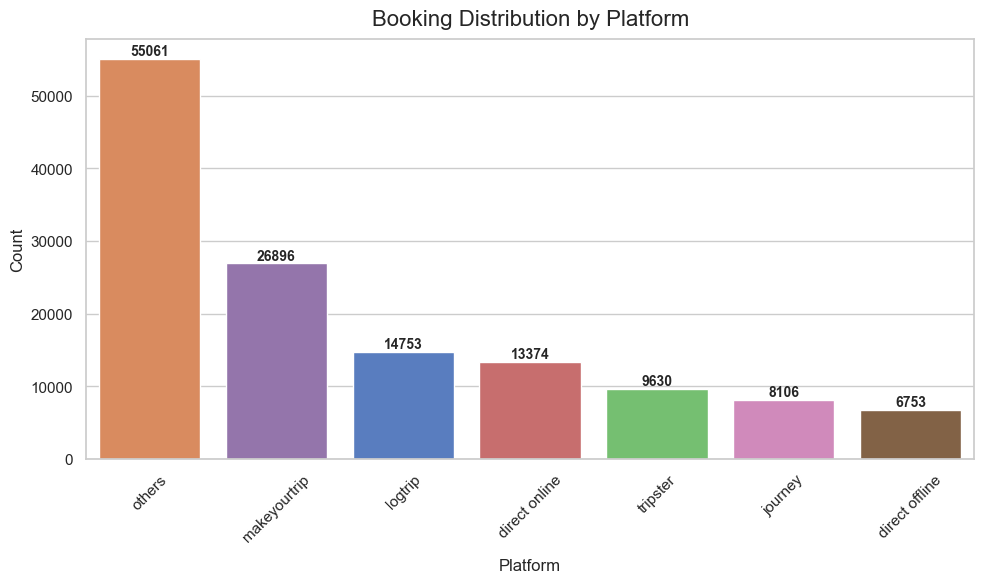

In [111]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_bookings_all, x='booking_platform', palette='muted', order=booking_counts.index,hue='booking_platform',legend = False)
plt.title('Booking Distribution by Platform', fontsize=16,pad= 10)
plt.xlabel('Platform',labelpad=10)
plt.ylabel('Count')
plt.xticks(rotation=45)
for i, count in enumerate(booking_counts):
    plt.text(i, count + 500, str(count), ha='center', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()


#### Insight:

- Over 50% of bookings come from the Others category → indicates a need to identify and track these sources.

- MakeMyTrip leads among OTAs, with nearly 2× the bookings of LogTrip.

- Direct Online ranks third but lags far behind OTA leaders.

- Offline channels contribute minimally → strong customer preference for online platforms


### Booking Distribution by City

In [112]:
city_counts = df_bookings_all['city'].value_counts()
print(city_counts)

city
Mumbai       43452
Hyderabad    34883
Bangalore    32015
Delhi        24223
Name: count, dtype: int64


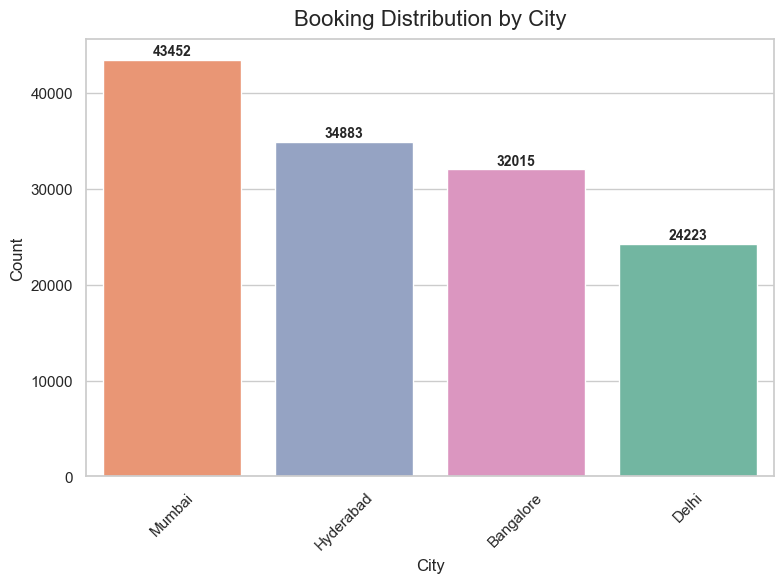

In [113]:
plt.figure(figsize=(8,6))
sns.countplot(data=df_bookings_all, x='city', palette='Set2', order=city_counts.index,hue='city',legend = False)
plt.title('Booking Distribution by City', fontsize=16,pad= 10)
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
for i, count in enumerate(city_counts):
    plt.text(i, count + 500, str(count), ha='center', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()

#### Insight:

Mumbai leads in bookings with 43.4K, followed by Hyderabad (34.9K) and Bangalore (32K), while Delhi records the lowest at 24.2K. This suggests Mumbai is the primary market driver, whereas Delhi shows potential for growth

### ✳️ B. Bivariate Analysis
Bivariate analysis studies how two variables are related to each other.

In [114]:
df.groupby('day_type')['ADR'].sum()

day_type
weekeday   95,333,820.10
weekend    39,776,279.53
Name: ADR, dtype: float64

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9194 entries, 0 to 9193
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   property_id          9194 non-null   int64         
 1   check_in_date        9194 non-null   datetime64[ns]
 2   room_category        9194 non-null   object        
 3   successful_bookings  9194 non-null   int64         
 4   capacity             9194 non-null   float64       
 5   room_class           9194 non-null   object        
 6   property_name        9194 non-null   object        
 7   category             9194 non-null   object        
 8   city                 9194 non-null   object        
 9   date                 9194 non-null   datetime64[ns]
 10  mmm_yy               9194 non-null   object        
 11  week no              9194 non-null   object        
 12  day_type             9194 non-null   object        
 13  occ_pct              9194 non-nul

***1. How does revenue realized vary across different room categories and cities?***

In [116]:
city_room_rev = (
    df_bookings_all.groupby(['city', 'room_class'], as_index=False)['revenue_realized']
      .sum()
)

In [117]:
city_order = (
    city_room_rev.groupby('city')['revenue_realized']
    .sum()
    .sort_values(ascending=False)
    .index
)

In [118]:
city_room_rev['city'] = pd.Categorical(city_room_rev['city'], categories=city_order, ordered=True)
city_room_rev = city_room_rev.sort_values(['city', 'revenue_realized'], ascending=[True, False])
city_room_rev = city_room_rev.reset_index(drop=True)
city_room_rev

,city,room_class,revenue_realized
0,Mumbai,Elite,232204734
1,Mumbai,Premium,175679088
2,Mumbai,Presidential,151608448
3,Mumbai,Standard,109076981
4,Bangalore,Elite,138159270
5,Bangalore,Premium,126931320
6,Bangalore,Standard,81082950
7,Bangalore,Presidential,74210010
8,Hyderabad,Elite,92015820
9,Hyderabad,Presidential,90320300


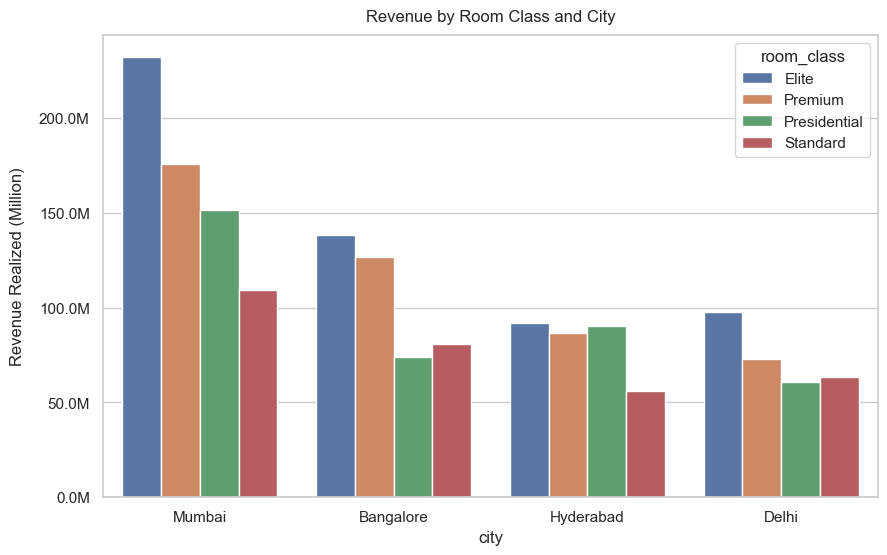

In [119]:
from matplotlib.ticker import FuncFormatter
plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=city_room_rev,
    x='city',
    y='revenue_realized',
    hue='room_class',
    
)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))
plt.ylabel('Revenue Realized (Million)',labelpad=10)
plt.title('Revenue by Room Class and City',pad=10)
plt.show()

#### Insight:

Mumbai leads in total revenue at ₹668M, driven mainly by Elite (₹232M) and Premium (₹176M) rooms. Bangalore follows with ₹420M, while Hyderabad (₹325M) and Delhi (₹294M) trail behind. Across all cities, Elite rooms consistently generate the highest revenue, indicating strong demand for luxury offerings.

***How does average occupancy percentage vary across room categories?***

In [120]:
city_room_occ= (
    df.groupby(['city', 'room_class'], as_index=False)['occ_pct']
      .mean()
    )

In [121]:
city_occ_order = (
    city_room_occ.groupby('city')['occ_pct']
    .mean()
    .sort_values(ascending=False)
    .index
)

In [122]:
city_room_occ['city'] = pd.Categorical(city_room_occ['city'], categories=city_occ_order, ordered=True)
city_room_occ = city_room_occ.sort_values(['city', 'occ_pct'], ascending=[True, False])
city_room_occ = city_room_occ.reset_index(drop=True)
city_room_occ

,city,room_class,occ_pct
0,Delhi,Presidential,63.25
1,Delhi,Premium,61.15
2,Delhi,Standard,60.92
3,Delhi,Elite,60.71
4,Hyderabad,Elite,58.29
5,Hyderabad,Presidential,58.22
6,Hyderabad,Premium,58.13
7,Hyderabad,Standard,57.83
8,Mumbai,Presidential,58.97
9,Mumbai,Premium,57.65


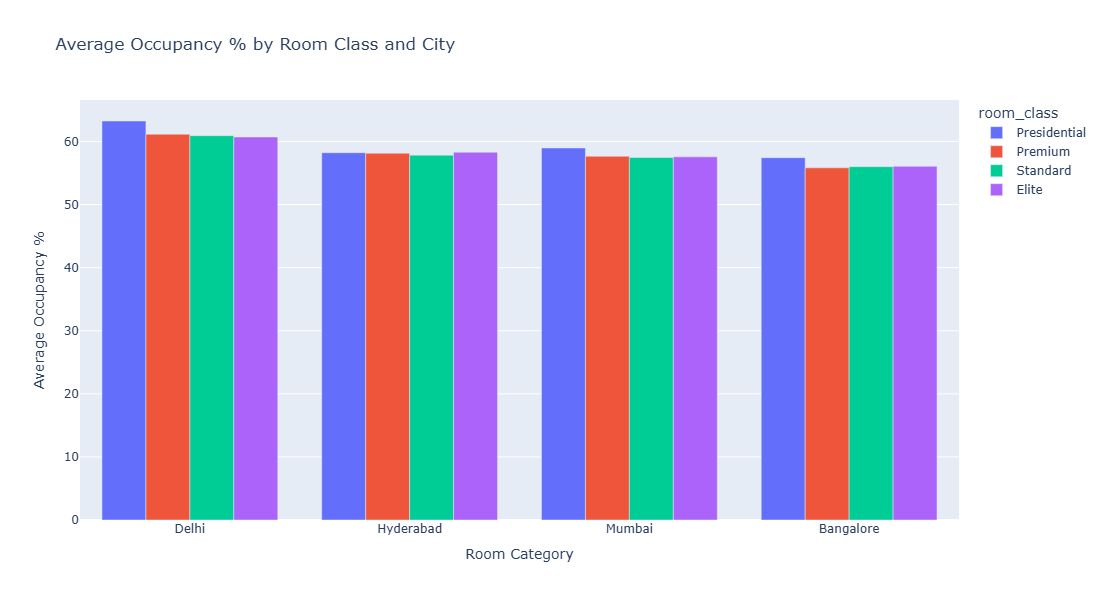

In [123]:
fig = px.bar(
    city_room_occ,
    x='city',
    y='occ_pct',
    color='room_class',
    barmode='group',
    title='Average Occupancy % by Room Class and City',
    labels={'occ_pct': 'Average Occupancy %', 'room_category': 'Room Class', 'city': 'City'}
)
fig.update_layout(
    xaxis_title='Room Category',
    yaxis_title='Average Occupancy %',
    height=600,
    width=900
)

fig.show()

#### Insight:

Delhi has the highest occupancy in Presidential rooms (63.25%), showing strong demand for luxury stays.

Hyderabad’s occupancy is more balanced, with Elite rooms slightly leading (58.29%).

Mumbai favors Presidential rooms (58.97%), but the gap with other categories is small.

Bangalore has the most even spread, with Presidential rooms at 57.44% and others close behind


***4.How does occupancy rate differ between weekdays and weekends across cities?***

In [124]:
day_occ = df.groupby(['city','day_type'],as_index = False)['occ_pct'].mean()

day_order = (
    day_occ.groupby('city')['occ_pct']
    .mean()
    .sort_values(ascending=False)
    .index
)

day_occ['city'] = pd.Categorical(day_occ['city'], categories=day_order, ordered=True)
day_occ = day_occ.sort_values(['city', 'occ_pct'], ascending=[True, False])
day_occ = day_occ.reset_index(drop=True)
day_occ



,city,day_type,occ_pct
0,Delhi,weekend,78.05
1,Delhi,weekeday,54.65
2,Hyderabad,weekend,74.05
3,Hyderabad,weekeday,51.51
4,Mumbai,weekend,73.21
5,Mumbai,weekeday,51.56
6,Bangalore,weekend,71.46
7,Bangalore,weekeday,50.06


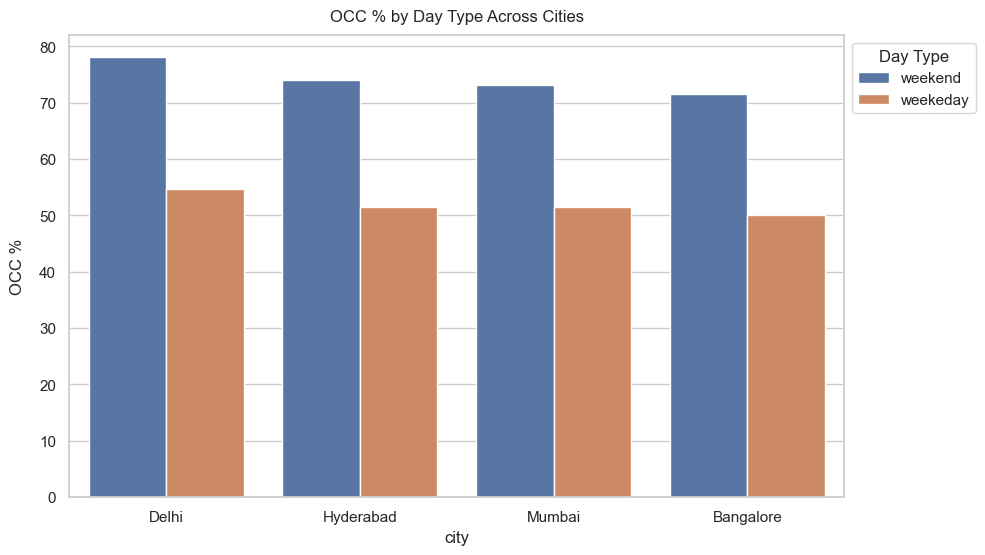

In [125]:
from matplotlib.ticker import FuncFormatter
plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=day_occ,
    x='city',
    y='occ_pct',
    hue='day_type',
    
)
plt.ylabel('OCC %',labelpad=10)
plt.title('OCC % by Day Type Across Cities',pad=10)
plt.legend(title='Day Type', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

#### Insight:

Hotels across all cities see stronger demand on weekends compared to weekdays. Delhi leads with the highest weekend occupancy (78%), indicating strong leisure traffic, while Bangalore records the lowest weekday occupancy (50%), suggesting scope to boost corporate bookings."

***5. What impact does room type have on pricing (ADR)?***

In [126]:
%matplotlib inline

In [127]:
df.groupby('room_class')['ADR'].mean()

room_class
Elite          11,231.29
Premium        15,208.09
Presidential   24,197.50
Standard        8,136.19
Name: ADR, dtype: float64

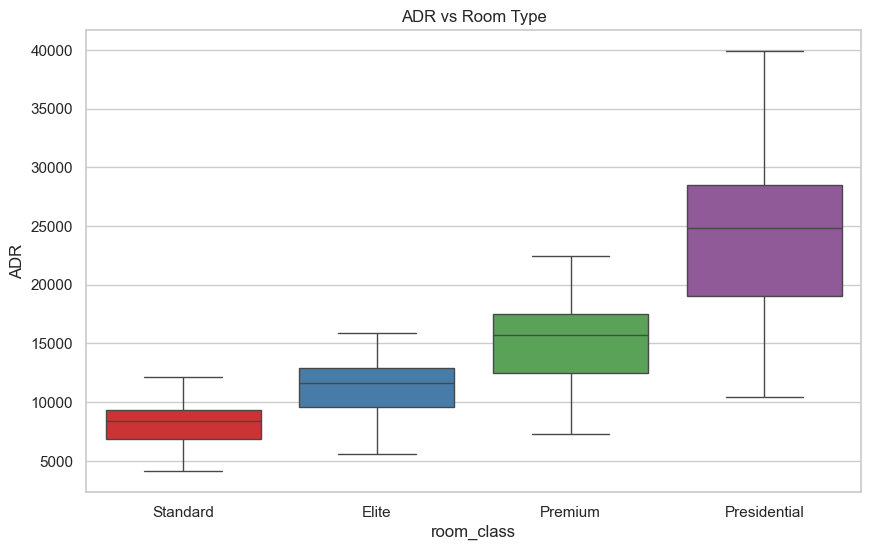

In [128]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='room_class', y='ADR',hue = 'room_class',palette='Set1')
plt.title('ADR vs Room Type')
plt.show()

#### Insight:

ADR rises consistently with room class, starting from Standard (₹4K–₹12K) and peaking at Presidential (₹10K–₹40K). The narrower spread for lower classes suggests stable, budget-driven pricing, while the broad range for Presidential rooms points to premium demand and dynamic seasonal pricing.

**Is Revenue generated more on weekday or weekend?**

In [129]:
day_type_rev = df_bookings_all.groupby('day_type')['revenue_realized'].sum().reset_index()
day_type_rev

,day_type,revenue_realized
0,weekeday,1069624122
1,weekend,638912477


In [130]:
%matplotlib inline

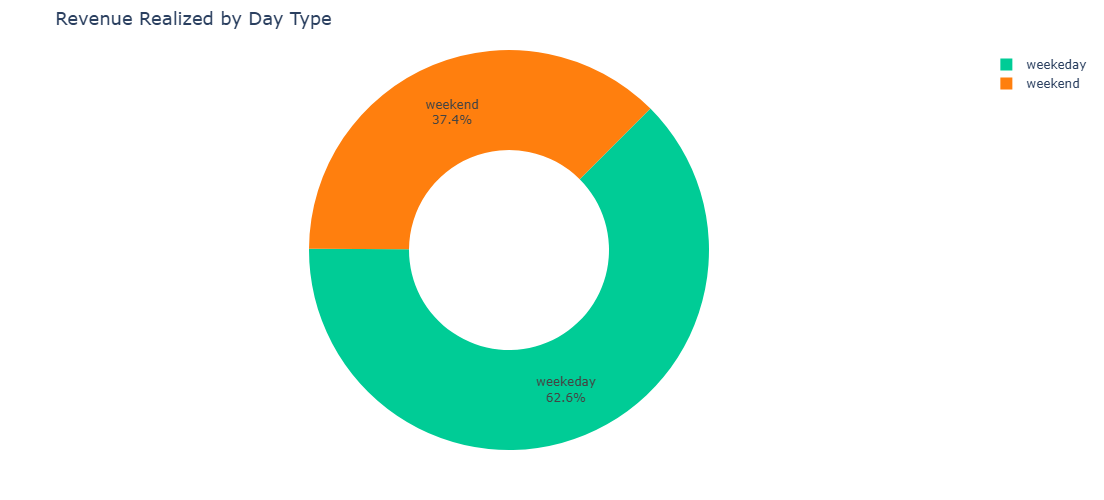

In [131]:

fig = px.pie(
    day_type_rev,
    names='day_type',
    values='revenue_realized',
    hole=0.5,  # Creates the donut hole
    color='day_type',
    color_discrete_map={'weekday': '#1f77b4', 'weekend': '#ff7f0e'},
    title='Revenue Realized by Day Type'
)

# Show percentages & values
fig.update_traces(
    textposition='inside',
    textinfo='percent+label',
    rotation=45
)
fig.update_layout(
    width=500, 
    height=500,   
    margin=dict(t=50, b=50, l=50, r=50), 
    title_font_size=18,
)

fig.show()

#### Insight:

The analysis shows that a significant majority of revenue (62.6%) is realized on weekdays, while weekends contribute 37.4% of the total revenue. This indicates that the business experiences higher customer engagement and sales during weekdays compared to weekends. 

***Occupancy %: Weekday vs Weekend comparison***

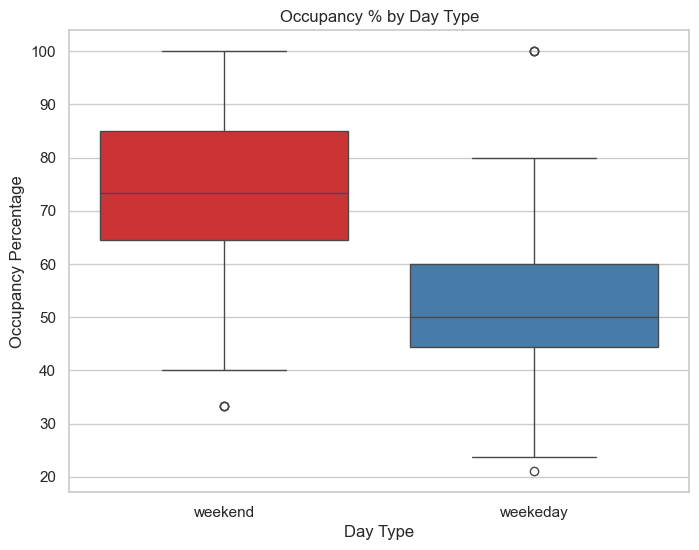

In [132]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='day_type', y='occ_pct',hue = 'day_type',palette='Set1')
plt.title('Occupancy % by Day Type')
plt.ylabel('Occupancy Percentage')
plt.xlabel('Day Type')
plt.show()

#### Insight:

The boxplot shows weekend occupancy is much higher than weekdays, with weekends averaging around 73% and weekdays around 50%. Weekends also show slightly more variation, while weekdays remain stable but lower. Outliers indicate rare spikes or dips in occupancy.


***What patterns exist between room class and stay length?***

In [133]:
df_bookings_all.groupby("room_class")['stay_length'].mean().sort_values(ascending=False)

room_class
Premium        2.41
Standard       2.37
Elite          2.37
Presidential   2.31
Name: stay_length, dtype: float64

#### Insight:
The average stay length across all room classes hovers around 2.3–2.4 days, indicating a consistent booking behavior regardless of room type. No significant trend is observed here.

***What causes the variation in occupancy rates among Atliq properties?***

In [134]:
property_occ = df.groupby('property_name')['occ_pct'].mean().sort_values(ascending=False).reset_index()
property_occ

,property_name,occ_pct
0,Atliq Blu,63.14
1,Atliq Palace,59.78
2,Atliq City,59.62
3,Atliq Bay,57.87
4,Atliq Exotica,57.85
5,Atliq Grands,54.99
6,Atliq Seasons,44.51


Text(0.5, 1.0, 'Occ % by Property')

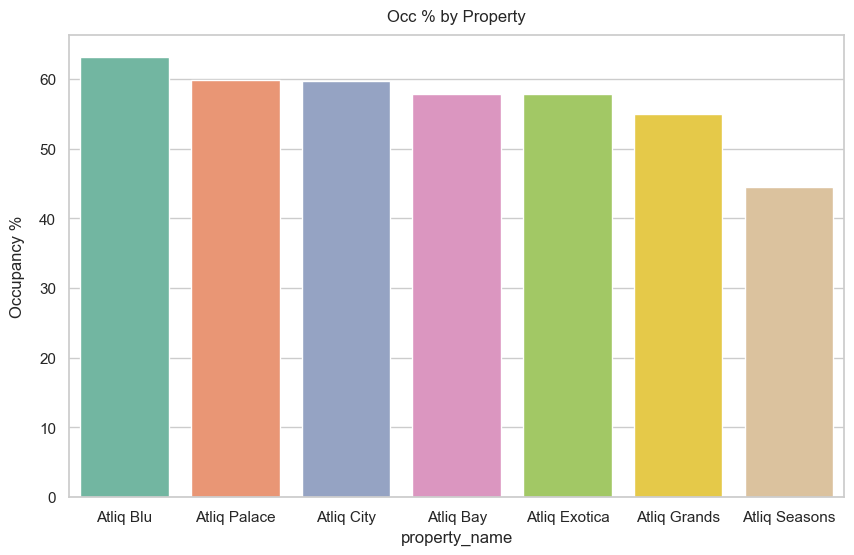

In [135]:
plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=property_occ,
    x='property_name',
    y='occ_pct',
    hue='property_name',
    palette='Set2'
    
)
plt.ylabel('Occupancy %',labelpad=10)
plt.title('Occ % by Property',pad=10)

#### Insight:
Atliq Blu has the highest occupancy at 63.14%, while Atliq Seasons has the lowest at 44.51%. Most properties have occupancy around 55–63%, except Atliq Seasons, which is notably lower.

***Which hotel types generate the highest revenue?***

In [136]:
property_revenue = df_bookings_all.groupby('property_name')['revenue_realized'].sum().sort_values(ascending=False).reset_index()
property_revenue

,property_name,revenue_realized
0,Atliq Exotica,320258588
1,Atliq Palace,304081863
2,Atliq City,285798439
3,Atliq Blu,260851922
4,Atliq Bay,259996918
5,Atliq Grands,211462134
6,Atliq Seasons,66086735


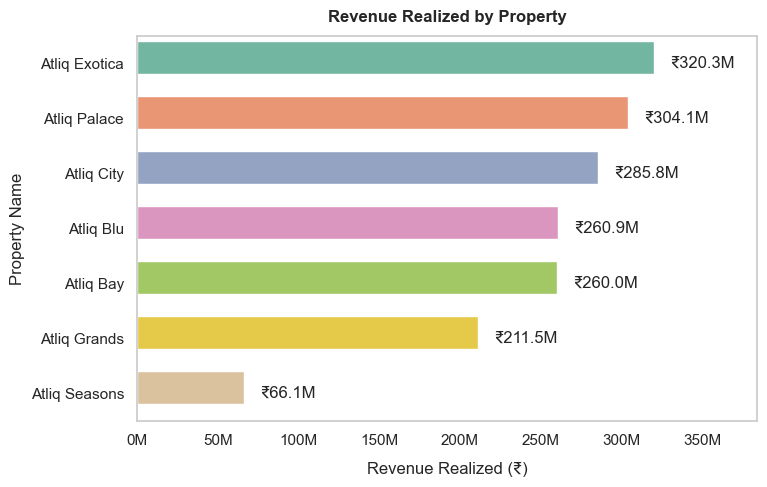

In [137]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=property_revenue,
    y='property_name',
    x='revenue_realized',
    hue = 'property_name',
    palette='Set2',
    legend = False,
    height=0.6
) 
plt.grid(False)
plt.title('Revenue Realized by Property',pad=10,fontweight='semibold')
plt.xlabel('Revenue Realized (₹)',labelpad=10)
plt.ylabel('Property Name')
plt.xlim(0, property_revenue['revenue_realized'].max() * 1.2)

 #Use FuncFormatter to format X-axis in millions
formatter = FuncFormatter(lambda x, _: f'{x/1_000_000:.0f}M')
ax.xaxis.set_major_formatter(formatter)

# Add labels
for index, value in enumerate(property_revenue['revenue_realized']):
    value_in_million = value / 1_000_000  # convert to millions
    plt.text(
        value + 10_000_000,  # push label a bit further out
        index,
        f'₹{value_in_million:.1f}M',
        va='center'
    )

plt.show()

#### Insight:
Atliq Exotica generated the highest revenue at ₹320.3M, followed by Atliq Palace and Atliq City, while Atliq Seasons performed the lowest with only ₹66.1M. This highlights a significant revenue gap among properties, suggesting varying demand or pricing strategies.

***Which cities exhibit the highest cancellation rates, and how can this insight optimize resource allocation?***

In [138]:
df_bookings_all['cancelled_status'] = df_bookings_all['booking_status'].apply(
    lambda x: 'Cancelled' if x.lower() == 'cancelled' else 'Not Cancelled'
)

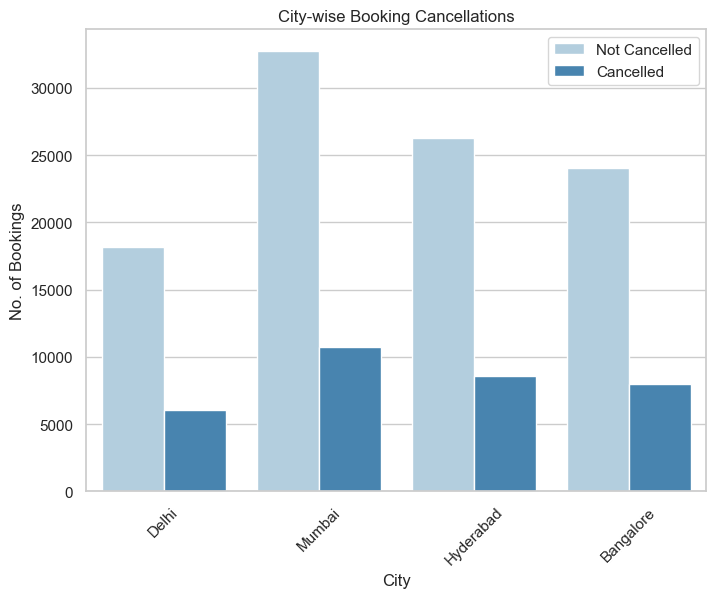

In [139]:
plt.figure(figsize=(8,6))
sns.countplot(data=df_bookings_all, x='city', hue='cancelled_status',palette='Blues')
plt.title('City-wise Booking Cancellations')
plt.xlabel('City')
plt.ylabel('No. of Bookings')
plt.xticks(rotation=45)
plt.legend(title=None)
plt.show()

#### Insight:
Mumbai records the highest bookings but also leads in cancellations, reducing overall efficiency.
Hyderabad and Bangalore maintain relatively better booking-to-cancellation ratios, while Delhi shows the lowest total bookings with moderate cancellations.

***How do cancellation trends differ among booking platforms, and what strategic actions can be derived?***

In [140]:
cancelled_counts = df_bookings_all[df_bookings_all['cancelled_status'] == 'Cancelled'] \
    .groupby('booking_platform').size().reset_index(name='cancelled_count')


In [141]:
sorted_platforms = cancelled_counts.sort_values(by='cancelled_count', ascending=False)['booking_platform']

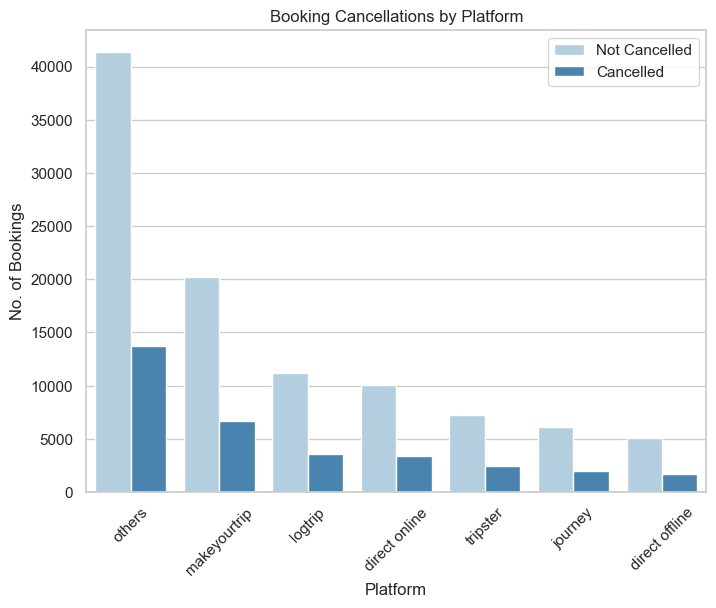

In [142]:
plt.figure(figsize=(8,6))
sns.countplot(data=df_bookings_all, x='booking_platform', hue='cancelled_status',palette='Blues', order=sorted_platforms)
plt.title('Booking Cancellations by Platform')
plt.xlabel('Platform')
plt.ylabel('No. of Bookings')
plt.xticks(rotation=45)
plt.legend(title=None)
plt.show()

#### Insight:
Most bookings come from the “Others” category, but it also has the highest cancellations, indicating inconsistent reliability.
MakeMyTrip shows strong booking volume with a lower cancellation ratio, suggesting better customer retention.
Direct offline bookings have the lowest cancellations.

***Which cities have the highest and lowest average ratings?***

In [143]:
city_rating = df_bookings_all.groupby('city')['ratings_given'].mean().round(2).sort_values(ascending=False).reset_index()
city_rating

,city,ratings_given
0,Delhi,3.78
1,Hyderabad,3.66
2,Mumbai,3.65
3,Bangalore,3.41


Text(0.5, 1.0, 'City-wise Average Ratings')

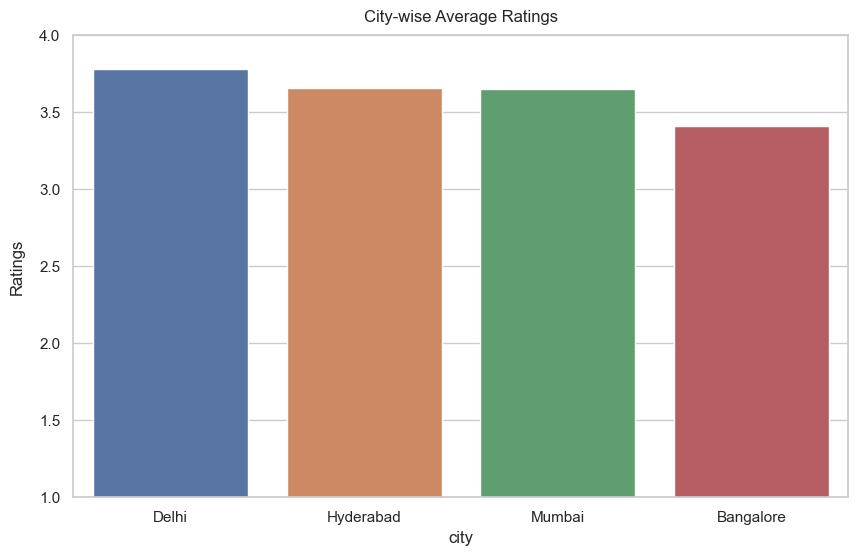

In [144]:
plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=city_rating,
    x='city',
    y='ratings_given',
    hue='city',
    
)
plt.ylabel('Ratings',labelpad=10)
plt.ylim(1.0,4.0)
plt.title('City-wise Average Ratings',pad=10)

#### Insight:
Customer satisfaction is highest in Delhi (3.78), followed by Hyderabad (3.66) and Mumbai (3.65), with Bangalore trailing at 3.41, signaling scope for enhancing customer experience.

***Which property receives the highest average customer rating?***

In [145]:
property_ratings = df_bookings_all.groupby('property_name')['ratings_given'].mean().round(2).sort_values(ascending = False).reset_index()
property_ratings['ratings_given'] = property_ratings['ratings_given'].astype(float)
property_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_name  7 non-null      object 
 1   ratings_given  7 non-null      float64
dtypes: float64(1), object(1)
memory usage: 244.0+ bytes


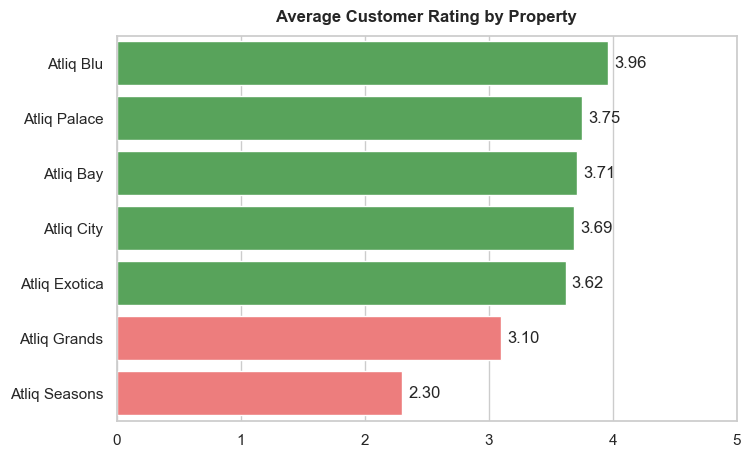

In [146]:
# Color: green for good, red for low rating
colors = ['#FF6B6B' if r < 3.5 else '#4CAF50' for r in property_ratings['ratings_given']]

plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=property_ratings,
    y='property_name',
    x='ratings_given',
    hue = 'property_name',
    palette=colors,
    legend = False
)

plt.title('Average Customer Rating by Property',pad=10,fontweight='semibold')
ax.set_xlabel(None)
ax.set_ylabel(None)
plt.xlim(0, 5)  
# Add value labels
for index, value in enumerate(property_ratings['ratings_given']):
    plt.text(value + 0.05, index, f'{value:.2f}', va='center')

plt.show()

#### Insight:
The chart shows that Atliq Blu has the highest average customer rating (3.96), while Atliq Seasons has the lowest (2.30). Most properties maintain ratings above 3.6, except Atliq Grands and Atliq Seasons, which underperform significantly.

***Which platforms contribute most to revenue, guiding marketing and partnership efforts?***

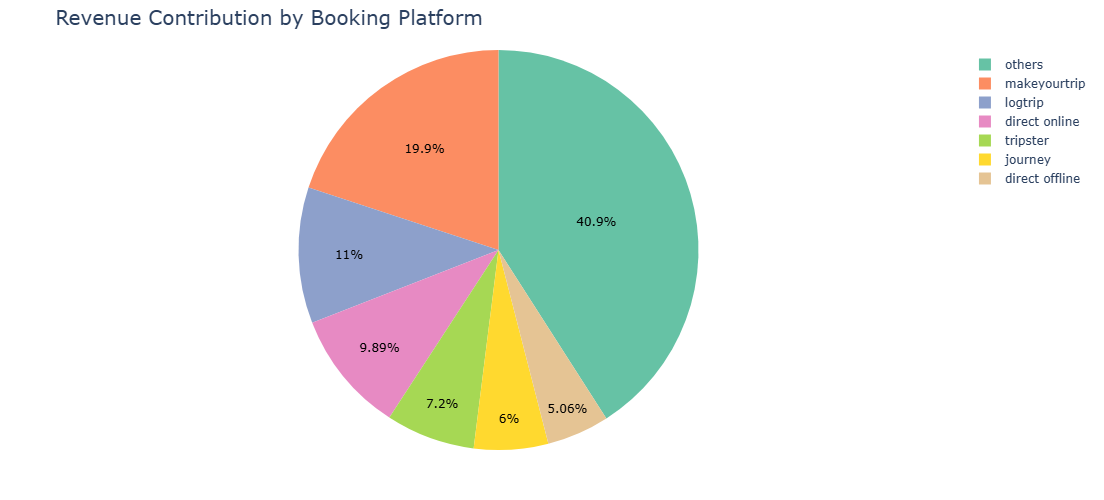

In [147]:
platform_revenue = df_bookings_all.groupby('booking_platform')['revenue_realized'].sum().reset_index()
palette = sns.color_palette('Set2').as_hex()
fig = px.pie(
    platform_revenue, 
    values='revenue_realized', 
    names='booking_platform', 
    title='Revenue Contribution by Booking Platform',
    color_discrete_sequence=palette,
     hole=0, 
)

fig.update_traces(textfont_color='black')

fig.update_layout(
    width=500, 
    height=500,   
    margin=dict(t=50, b=50, l=50, r=50), 
    title_font_size=20,
)

fig.show()

#### Insight:
The revenue distribution across booking platforms highlights a strong dependence on the "Others" category, contributing approximately ₹699M, which alone accounts for over 40.9% of the total revenue. This may indicate a high volume of bookings from undefined or third-party sources that are not being distinctly categorized.

MakeyourTrip emerges as the leading defined platform with ₹341M, followed by Logtrip and Direct Online, while platforms like Tripster, Journey, and Direct Offline contribute significantly less.

### ✳️ C. Time Series Analysis
it is a statistical technique used to analyze data points collected or recorded at successive, equally spaced time intervals to identify patterns, trends, seasonality, and other temporal relationships, and to forecast future values.

***How does ADR fluctuate month-to-month by property?***

In [148]:
adr_monthly = df.groupby(['property_name', 'mmm_yy'])['ADR'].mean().reset_index()

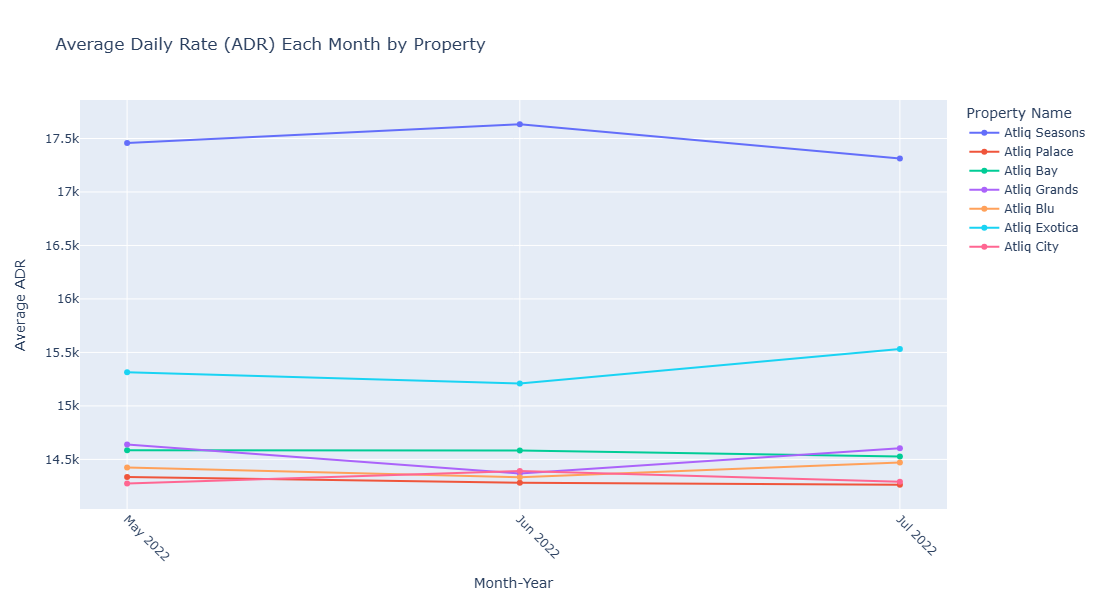

In [149]:
adr_monthly['month_dt'] = pd.to_datetime(adr_monthly['mmm_yy'], format='%b %y')
adr_monthly = adr_monthly.sort_values('month_dt')

fig = px.line(
    adr_monthly,
    x='month_dt',
    y='ADR',
    color='property_name',
    markers=True,
    title='Average Daily Rate (ADR) Each Month by Property',
    labels={'month_dt': 'Month-Year', 'ADR': 'Average ADR', 'property_name': 'Property Name'}
)

fig.update_layout(
    xaxis=dict(
        tickformat='%b %Y',
        tickangle=45,
        dtick="M1" 
    ),
    legend_title_text='Property Name',
    height=600,
    width=900
)

fig.show()


#### Insight:
The chart shows that Atliq Seasons consistently has the highest Average Daily Rate (ADR) across months, peaking in June 2022, while other properties remain in a narrow range around ₹14.3k–₹15.5k. Atliq Exotica follows as the second highest, showing an upward trend in July, whereas most others remain relatively stable with minimal fluctuations.

***How does monthly revenue realized trend over time?***

In [150]:
revenue_monthly = df_bookings_all.groupby('mmm_yy')['revenue_realized'].sum().reset_index()

revenue_monthly['month_dt'] = pd.to_datetime(revenue_monthly['mmm_yy'], format='%b %y')
revenue_monthly = revenue_monthly.sort_values('month_dt')
revenue_monthly

,mmm_yy,revenue_realized,month_dt
2,May 22,581767396,2022-05-01
1,Jun 22,553925855,2022-06-01
0,Jul 22,572843348,2022-07-01


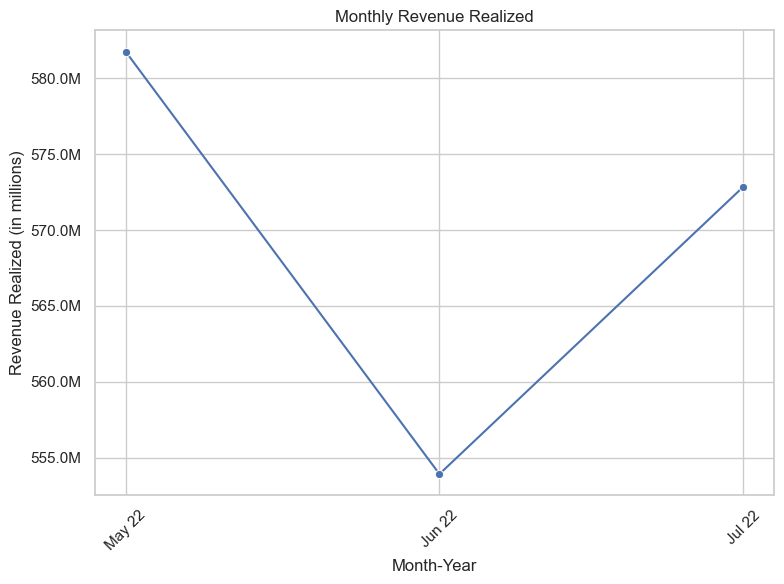

In [151]:
import matplotlib.dates as mdates

plt.figure(figsize=(8,6))
sns.lineplot(data=revenue_monthly, x='month_dt', y='revenue_realized', marker='o')

plt.title('Monthly Revenue Realized')
plt.xlabel('Month-Year')
plt.ylabel('Revenue Realized (in millions)')
plt.xticks(rotation=45)


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.gca().get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, _: f'{x*1e-6:.1f}M')
)

plt.tight_layout()
plt.show()


#### Insight:
The chart indicates that monthly revenue peaked at ~₹582M in May 2022, dropped sharply to ~₹554M in June 2022, and then recovered to ~₹573M in July 2022. This suggests a mid-period dip followed by partial recovery, highlighting possible seasonal or operational factors affecting June’s performance.

***Which city consistently performs best in terms of monthly revenue realized?***

In [152]:
revenue_city_month = df_bookings_all.groupby(['city', 'mmm_yy'])['revenue_realized'].sum().reset_index()

revenue_city_month['month_dt'] = pd.to_datetime(revenue_city_month['mmm_yy'], format='%b %y')
revenue_city_month = revenue_city_month.sort_values('month_dt')
revenue_city_month = revenue_city_month.reset_index(drop=True)
revenue_city_month

,city,mmm_yy,revenue_realized,month_dt
0,Bangalore,May 22,143789940,2022-05-01
1,Delhi,May 22,99462524,2022-05-01
2,Hyderabad,May 22,111206640,2022-05-01
3,Mumbai,May 22,227308292,2022-05-01
4,Bangalore,Jun 22,136195290,2022-06-01
5,Delhi,Jun 22,96264168,2022-06-01
6,Hyderabad,Jun 22,104902530,2022-06-01
7,Mumbai,Jun 22,216563867,2022-06-01
8,Bangalore,Jul 22,140398320,2022-07-01
9,Delhi,Jul 22,98677796,2022-07-01


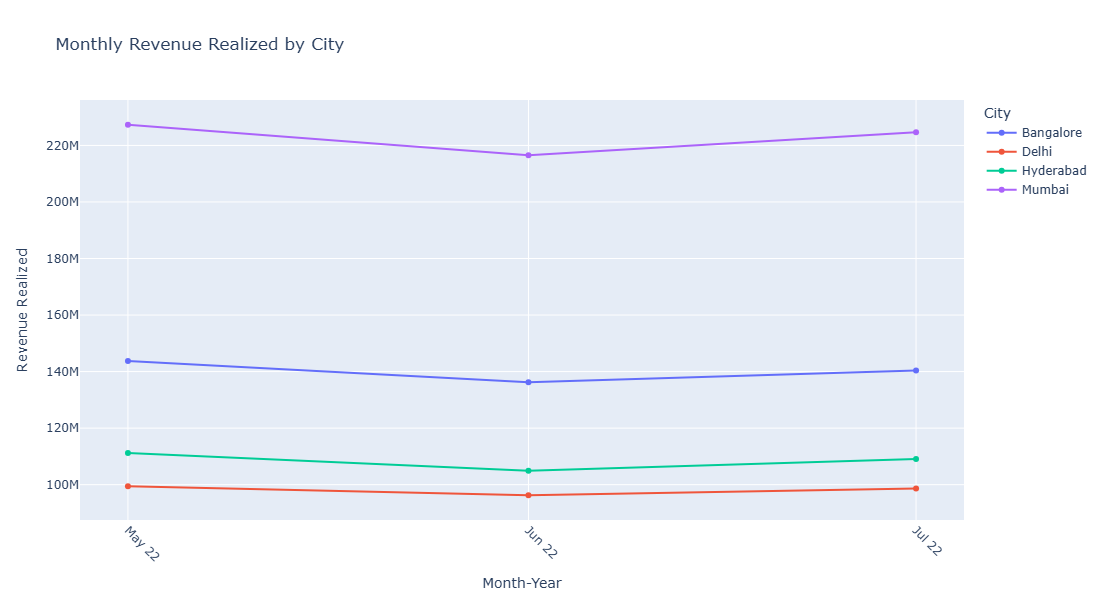

In [153]:
fig = px.line(
    revenue_city_month,
    x='month_dt',
    y='revenue_realized',
    color='city',
    markers=True,
    title='Monthly Revenue Realized by City',
    labels={'month_dt': 'Month-Year', 'revenue_realized': 'Revenue', 'city': 'City'}
)

fig.update_layout(
    xaxis=dict(
        tickformat='%b %y',
        tickangle=45,
        dtick="M1"
        
    ),
    yaxis_title='Revenue Realized',
    height=600,
    width=800
)

fig.show()

#### Insight:
Mumbai leads with ₹217M–₹227M, followed by Bangalore at ₹136M–₹143M. Hyderabad (₹105M–₹111M) and Delhi (₹96M–₹99M) contribute the least, with all cities dipping in June before recovering in July

### ✳️ D. Multivariate Analysis
Multivariate analysis studies three or more variables at the same time to see how they relate and affect each other.

### Correlation Heatmap

A correlation heatmap is a visual representation of how strongly numerical variables are related to each other. Each cell in the heatmap shows a correlation coefficient between two variables, with values closer to 1 or -1 indicating a stronger positive or negative relationship, and values near 0 showing little to no relationship. 

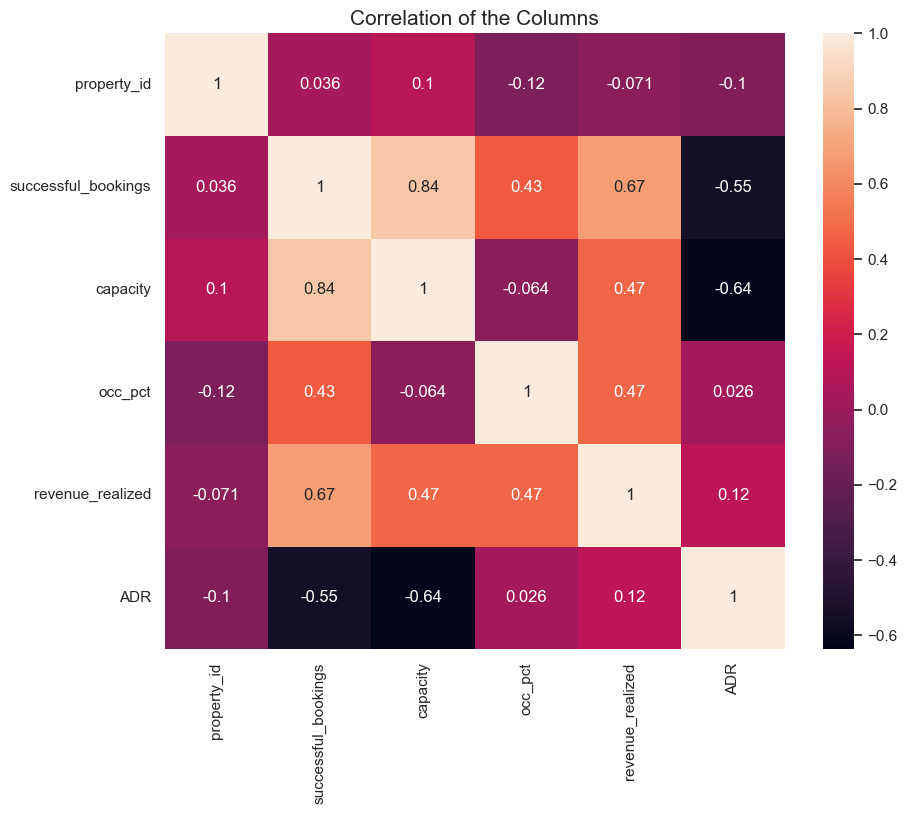

In [154]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.title('Correlation of the Columns',fontsize=15)
plt.show()

#### Insight:
The correlation matrix reveals that capacity and successful_bookings (0.84) are strongly linked, and both positively influence revenue_realized (0.47 and 0.67). ADR shows a strong negative correlation with capacity (-0.64) and successful_bookings (-0.55), implying higher rates may lower booking volume. Occ_pct moderately correlates with revenue (0.47), highlighting occupancy as a key revenue driver, while ADR has minimal impact on occupancy (0.026).

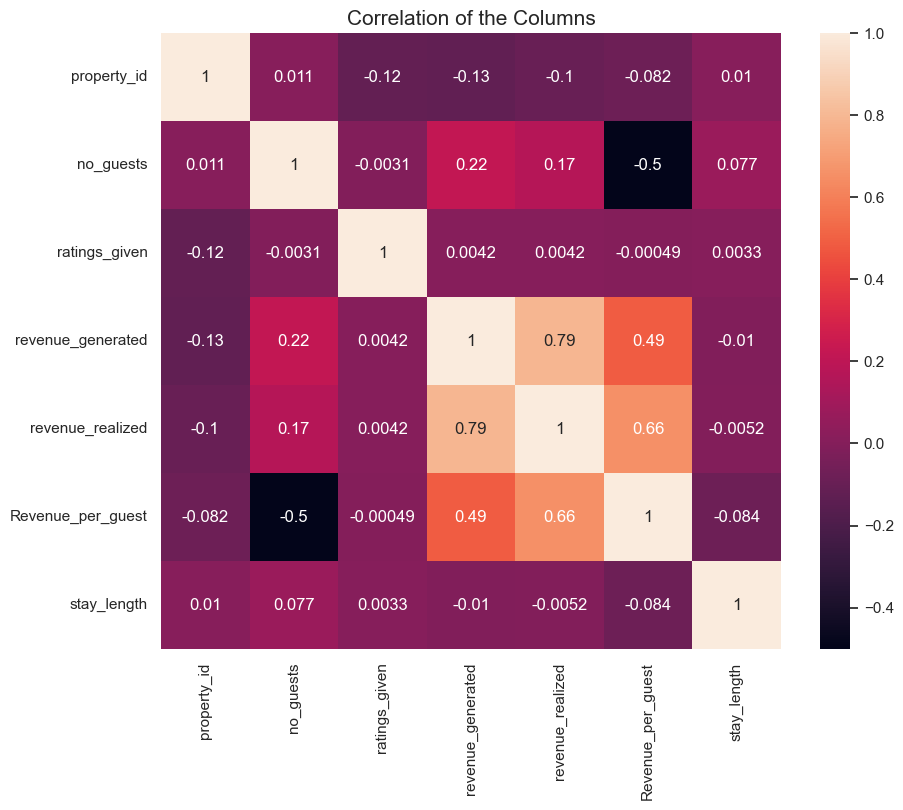

In [155]:
plt.figure(figsize=(10,8))
sns.heatmap(df_bookings_all.corr(numeric_only=True),annot=True)
plt.title('Correlation of the Columns',fontsize=15)
plt.show()

#### Insight:
The heatmap shows a strong positive correlation between revenue_generated and revenue_realized (0.79), as well as between revenue_realized and revenue_per_guest (0.66), indicating that higher realized revenue also improves per-guest earnings. No_guests has a moderate positive correlation with both revenue_generated (0.22) and revenue_realized (0.17) but a strong negative correlation with revenue_per_guest (-0.5), suggesting that while more guests increase total revenue, it may reduce earnings per guest. Ratings and stay length show minimal correlation with revenue metrics.

### Pairplot

A pairplot displays scatter plots for each pair of numerical variables and histograms for individual variables. It helps identify relationships, trends, and potential clusters, as well as spot outliers in the data.

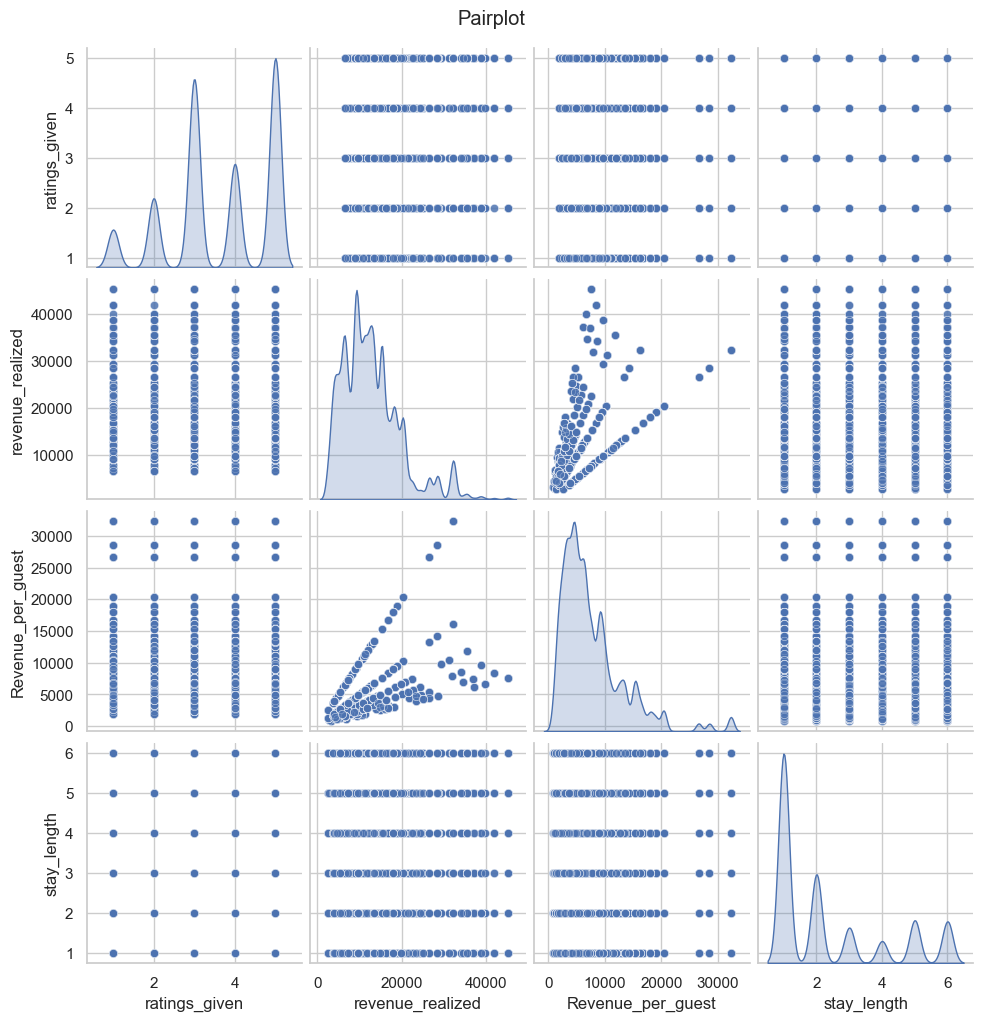

In [156]:
sns.pairplot(
    df_bookings_all[['ratings_given', 'revenue_realized', 'Revenue_per_guest', 'stay_length']],
    diag_kind='kde',
    plot_kws={'alpha': 0.6}
)

plt.suptitle("Pairplot", y=1.02)
plt.show()

***Exporting Cleaned DataFrames to CSV***

In [157]:
import os
os.makedirs("data/processed", exist_ok=True)

# Save the file there
df.to_csv("data/processed/fact_agg_clean.csv", index=False)
df_bookings_all.to_csv("data/processed/bookings_clean.csv", index=False)